# 텍스트 마이닝 1

## 2019-12-19

## 김도형

## 목차

* 말뭉치
* 토큰화
* 정규화
* 빈도 분석
* 워드 클라우드
* 한글 형태소 분석
* 확률론적 언어 모형
* Bag of Words
* TF-IDF

## 필요 지식

* 확률론 기초

  * 조건부 확률


* 파이썬 기초


## 필수 임포트 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

## 필요 패키지

* NLTK
* KoNLPy
* Gensim
* Scikit-Learn

## NLTK 패키지 설치

```
conda install nltk
pip install nltk
```

## 말뭉치

* 말뭉치(Corpus)

  * 텍스트 분석에 필요한 텍스트 데이터


* 웹 크롤링(web crawling) 등으로 수집
* 텍스트 처리 패키지에서 제공하는 샘플 말뭉치 사용

## 실습 1: NLTK의 샘플 말뭉치 다운로드 및 살펴보기

### step 1: 샘플 말뭉치 다운로드

In [2]:
%%time
import nltk
nltk.download("book")
nltk.download("movie_reviews")
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/dockeruser/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /home/dockeruser/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /home/dockeruser/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/dockeruser/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /home/dockeruser/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /home/dockeruser/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nlt

CPU times: user 430 ms, sys: 90 ms, total: 520 ms
Wall time: 1.05 s


[nltk_data]    |   Package maxent_ne_chunker is already up-to-date!
[nltk_data]    | Downloading package universal_tagset to
[nltk_data]    |     /home/dockeruser/nltk_data...
[nltk_data]    |   Package universal_tagset is already up-to-date!
[nltk_data]    | Downloading package punkt to
[nltk_data]    |     /home/dockeruser/nltk_data...
[nltk_data]    |   Package punkt is already up-to-date!
[nltk_data]    | Downloading package book_grammars to
[nltk_data]    |     /home/dockeruser/nltk_data...
[nltk_data]    |   Package book_grammars is already up-to-date!
[nltk_data]    | Downloading package city_database to
[nltk_data]    |     /home/dockeruser/nltk_data...
[nltk_data]    |   Package city_database is already up-to-date!
[nltk_data]    | Downloading package tagsets to
[nltk_data]    |     /home/dockeruser/nltk_data...
[nltk_data]    |   Package tagsets is already up-to-date!
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     /home/dockeruser/nltk_data...
[nl

True

### step 2: 구텐베르그 말뭉치 목록

In [3]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

### step 3: "제인 오스틴"의 "엠마" 말뭉치

In [4]:
emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")
print(emma_raw[:702])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.


## 토큰화

* 토큰화 (Tokenizing)

 * 말뭉치(텍스트 데이터)를 "토큰"이라고 불리는 작은 단위로 나누는 행위


* 토큰 (Token)

 * 문장, 단어, 형태소 등 분석에 있어서 의미를 가지는 단위
 
 
* 토큰의 명칭

 * 토큰의 이름은 실제 토큰의 활용과 관계가 없다.
 * 숫자 혹은 기호로 나타내거나
 * 품사 등을 덧붙여서 쓰는 경우도 있음

## 토큰의 종류

* 영어: 의미가 같은 정규화된 단어

> I am a boy. => I + am + a + boy + .

* 한국어: 의미가 같은 정규화된 형태소

> 나는 소년이다. => 나 + 는 + 소년 + 이 + 다 + .

## 형태소

* 형태소(morpheme)

 * 의미를 가진 가장 작은 말의 단위
 
 
* 한국어 형태소

 * 자립 형태소: 체언(명사, 대명사, 수사), 수식언(관형사, 부사), 감탄사 등
 * 의존 형태소: 접사, 어미, 조사, 어간 등

## 정규화

* 정규화(Normalization)

  * 의미와 쓰임이 같은 단어를 같은 토큰으로 표시


* 대소문자 통합 (case removal)
* 어간 추출 (stemming)
* 표제어 추출 (lemmaization)
* 품사 부착 (Part-Of-Speech tagging)
* 불용어 (stopwords)

## 어간 추출

* 어간 추출 (stemming)

  * 단어를 어간과 접사로 분리하여 단순히 접사를 삭제하거나 교체
  
    * 어간(stem): 단어의 의미를 담고 있는 핵심 부분
    * 접사(affix): 단어에 부가적인 의미를 주는 부분


  * 단순 알고리즘 사용
  
    * 포터(Porter) 알고리즘 
    * 랭케스터(Lancaster) 알고리즘




## 표제어 추출

* 표제어 추출 (Lemmatization)

  * 기본 사전형 단어로 변형
  * am, is, are, was, were, been => be
  * has, had => have
  
  
* 사전 정보(WordNet) 사용

## 품사 부착

* 품사 (POS: Part-Of-Speech)

 * 단어의 쓰임에 따른 구분
 
 
* 동일한 철자의 단어가 다른 의미나 다른 품사로 쓰이는 경우

  * 다른 토큰으로 토큰화 해야 한다.
  
  
* 예:

  * Permit: 허락하다(동사), 허가증(명사)
  * Refuse: 거부하다(동사), 쓰레기/배출(명사)

## 불용어

* 불용어 (Stop-Words)

  * 분석의 필요성이 없는 단어


* 모든 문서에서 너무 자주 쓰이는 단어
* 너무 드물게 나타나는 단어

## 실습 2: 토큰화와 정규화

### step 1: 토큰화

* NLTK의 `word_tokenize` 함수 사용

In [5]:
sent = emma_raw[50:196]
print(sent)

Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence


In [6]:
from nltk.tokenize import word_tokenize
word_tokenize(sent)

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence']

### step 2: 어간 추출

* NLTK의 `PorterStemmer`  `LancasterStemmer` 사용

In [7]:
from nltk.stem import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()
st2 =  LancasterStemmer()

words = ["fly", "flies", "flying", "flew", "flown"]

print("Porter Stemmer   :", [st1.stem(w) for w in words])
print("Lancaster Stemmer:", [st2.stem(w) for w in words])

Porter Stemmer   : ['fli', 'fli', 'fli', 'flew', 'flown']
Lancaster Stemmer: ['fly', 'fli', 'fly', 'flew', 'flown']


### step 3: 표제어 추출

* NLTK의 `WordNetLemmatizer` 사용

In [8]:
from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()

[lm.lemmatize(w, pos="v") for w in words]

['fly', 'fly', 'fly', 'fly', 'fly']

### step 4: 품사 부착

* NLTK의 `pos_tag` 사용

In [9]:
from nltk.tag import pos_tag

sentence = "Emma refused to permit us to obtain the refuse permit"
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [10]:
def tokenizer(sentence):
    tagged_list = pos_tag(word_tokenize(sentence))
    return ["/".join(p) for p in tagged_list]

tokenizer(sentence)

['Emma/NNP',
 'refused/VBD',
 'to/TO',
 'permit/VB',
 'us/PRP',
 'to/TO',
 'obtain/VB',
 'the/DT',
 'refuse/NN',
 'permit/NN']

### step 5: 불용어

* NLTK의 `stopwords` 사용

In [11]:
from nltk.corpus import stopwords

stopwords.words("english")[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

## 빈도 분석

* 특정 단어가 나타나는 횟수 및 위치 분석


* 단어의 중요도
* 문서의 종류 및 유사도 분석에 사용

## NLTK의 빈도 분석

* 두 가지 클래스 사용

 * `Text` 클래스
 * `FreqDist` 클래스

## Text 클래스

NLTK의 `Text` 클래스는 문서 분석에 유용한 여러가지 메서드를 제공한다.

* `plot`: 단어 빈도 그래프
* `dispersion_plot`: 단어 위치 그래프
* `concordance`: 단어 문맥 인쇄
* `similar`: 유사 단어 검색
* `common_contexts`: 공통 문맥


## 실습 3: Text 클래스 실습

### step 1: 클래스 객체 생성

In [12]:
from nltk import Text

text = Text(word_tokenize(emma_raw))

### step 2: 단어 빈도 그래프

`plot` 메소드를 사용하면 각 단어(토큰)의 사용 빈도를 그래프로 그려준다.

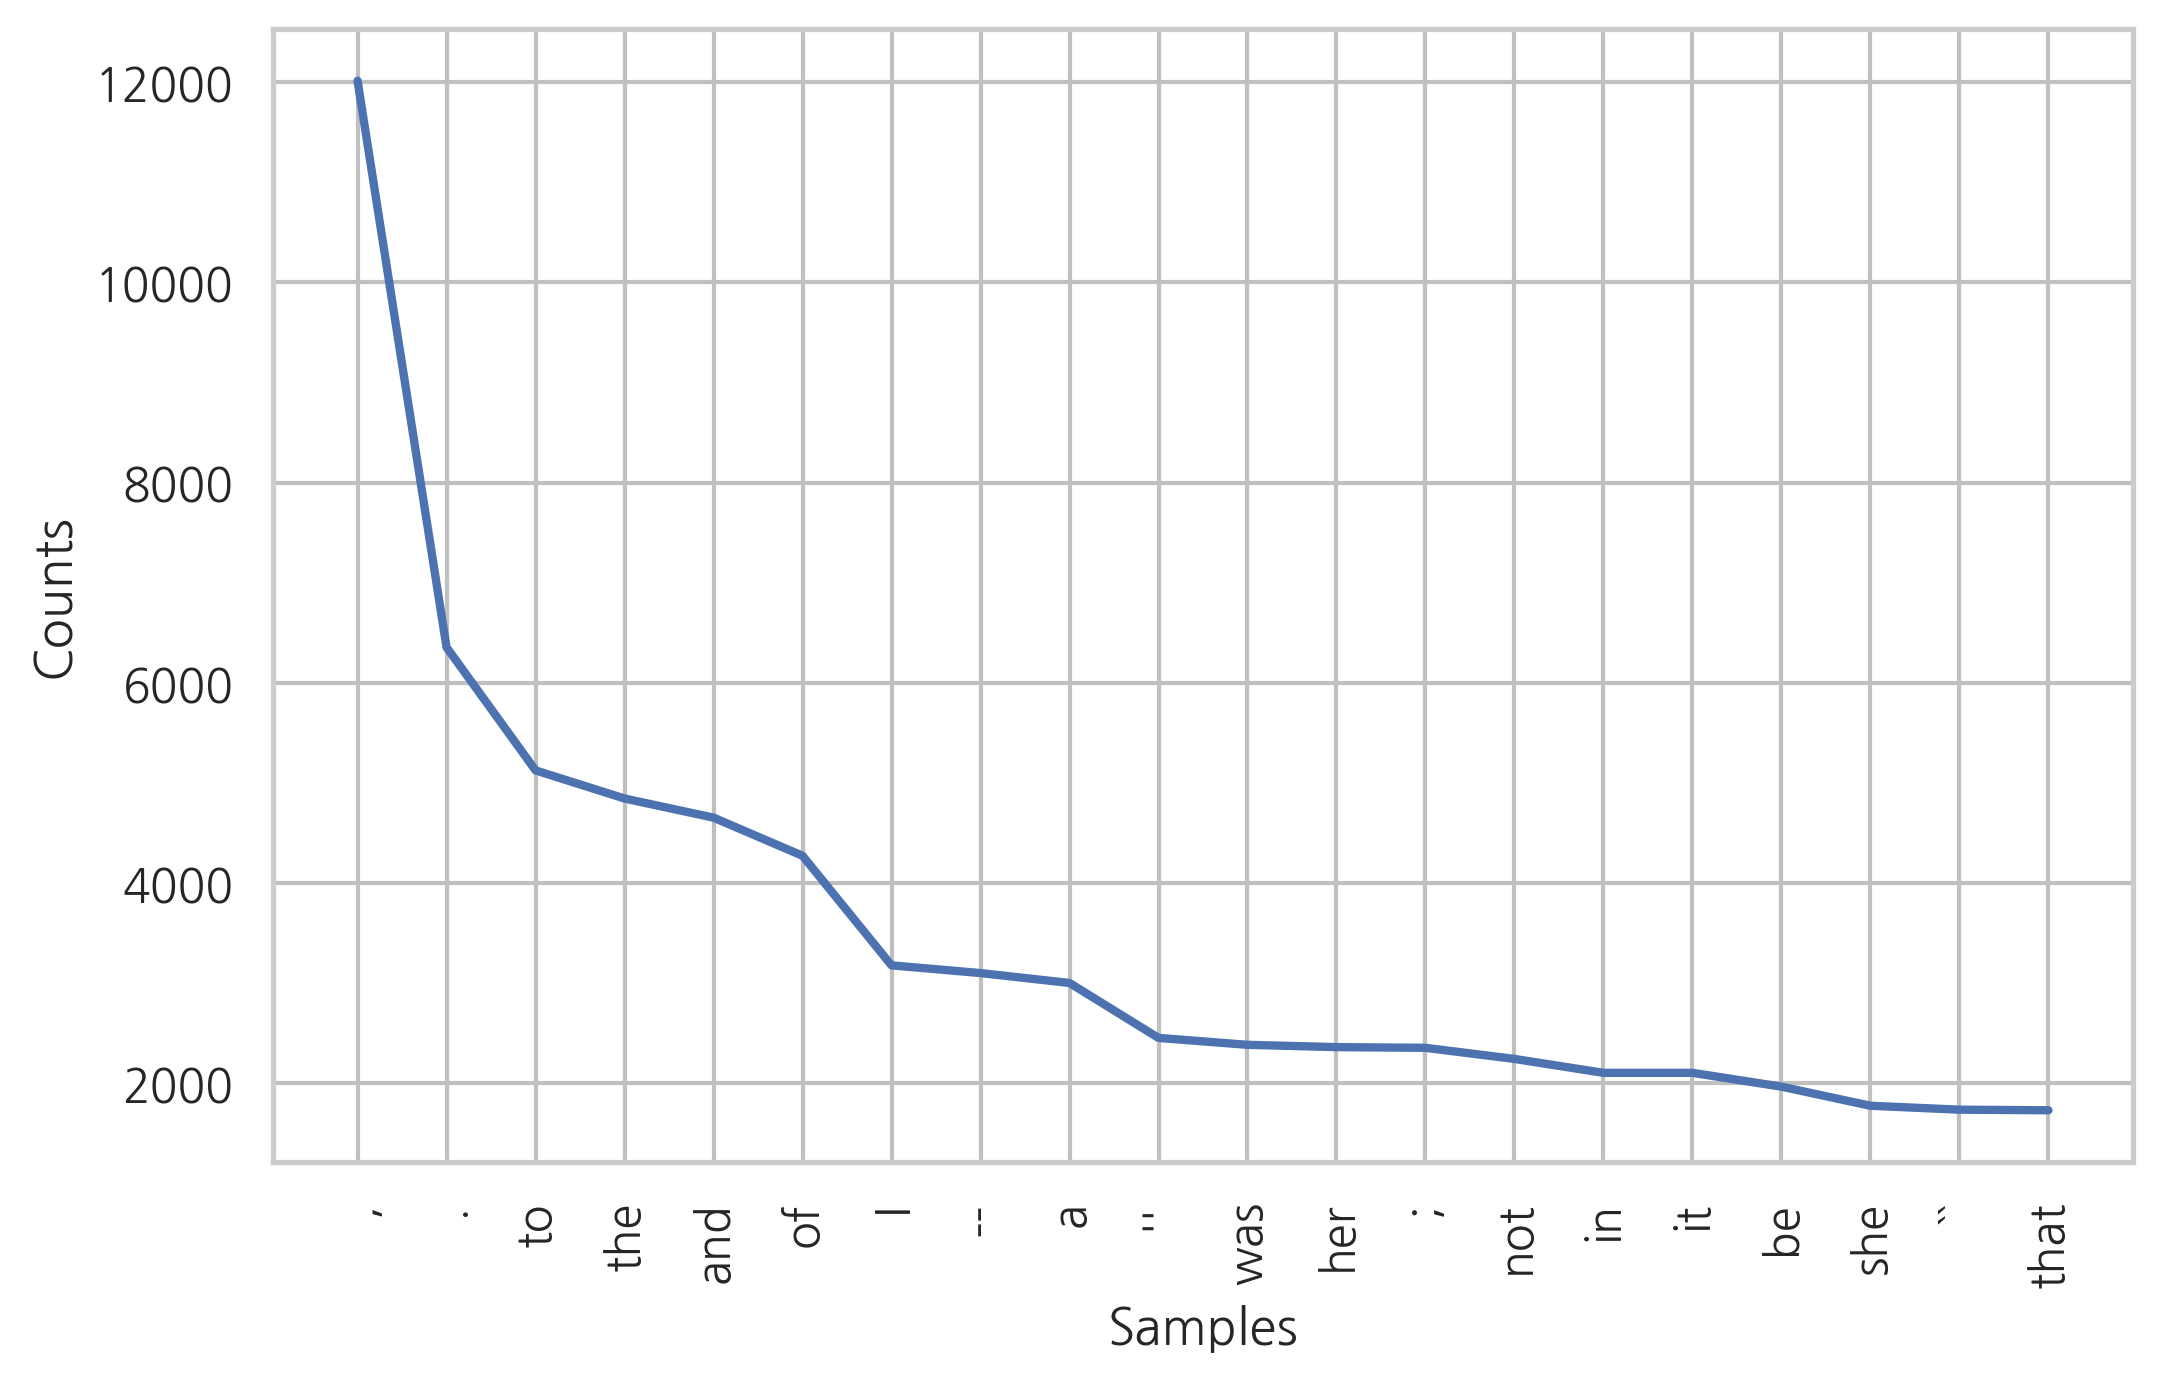

In [13]:
text.plot(20)
plt.show()

### step 3: 단어 위치 그래프

`dispersion_plot` 메서드는 단어가 사용된 위치를 시각화한다. 소설 엠마의 각 등장인물에 대해 적용하면 다음과 같은 결과를 얻는다.

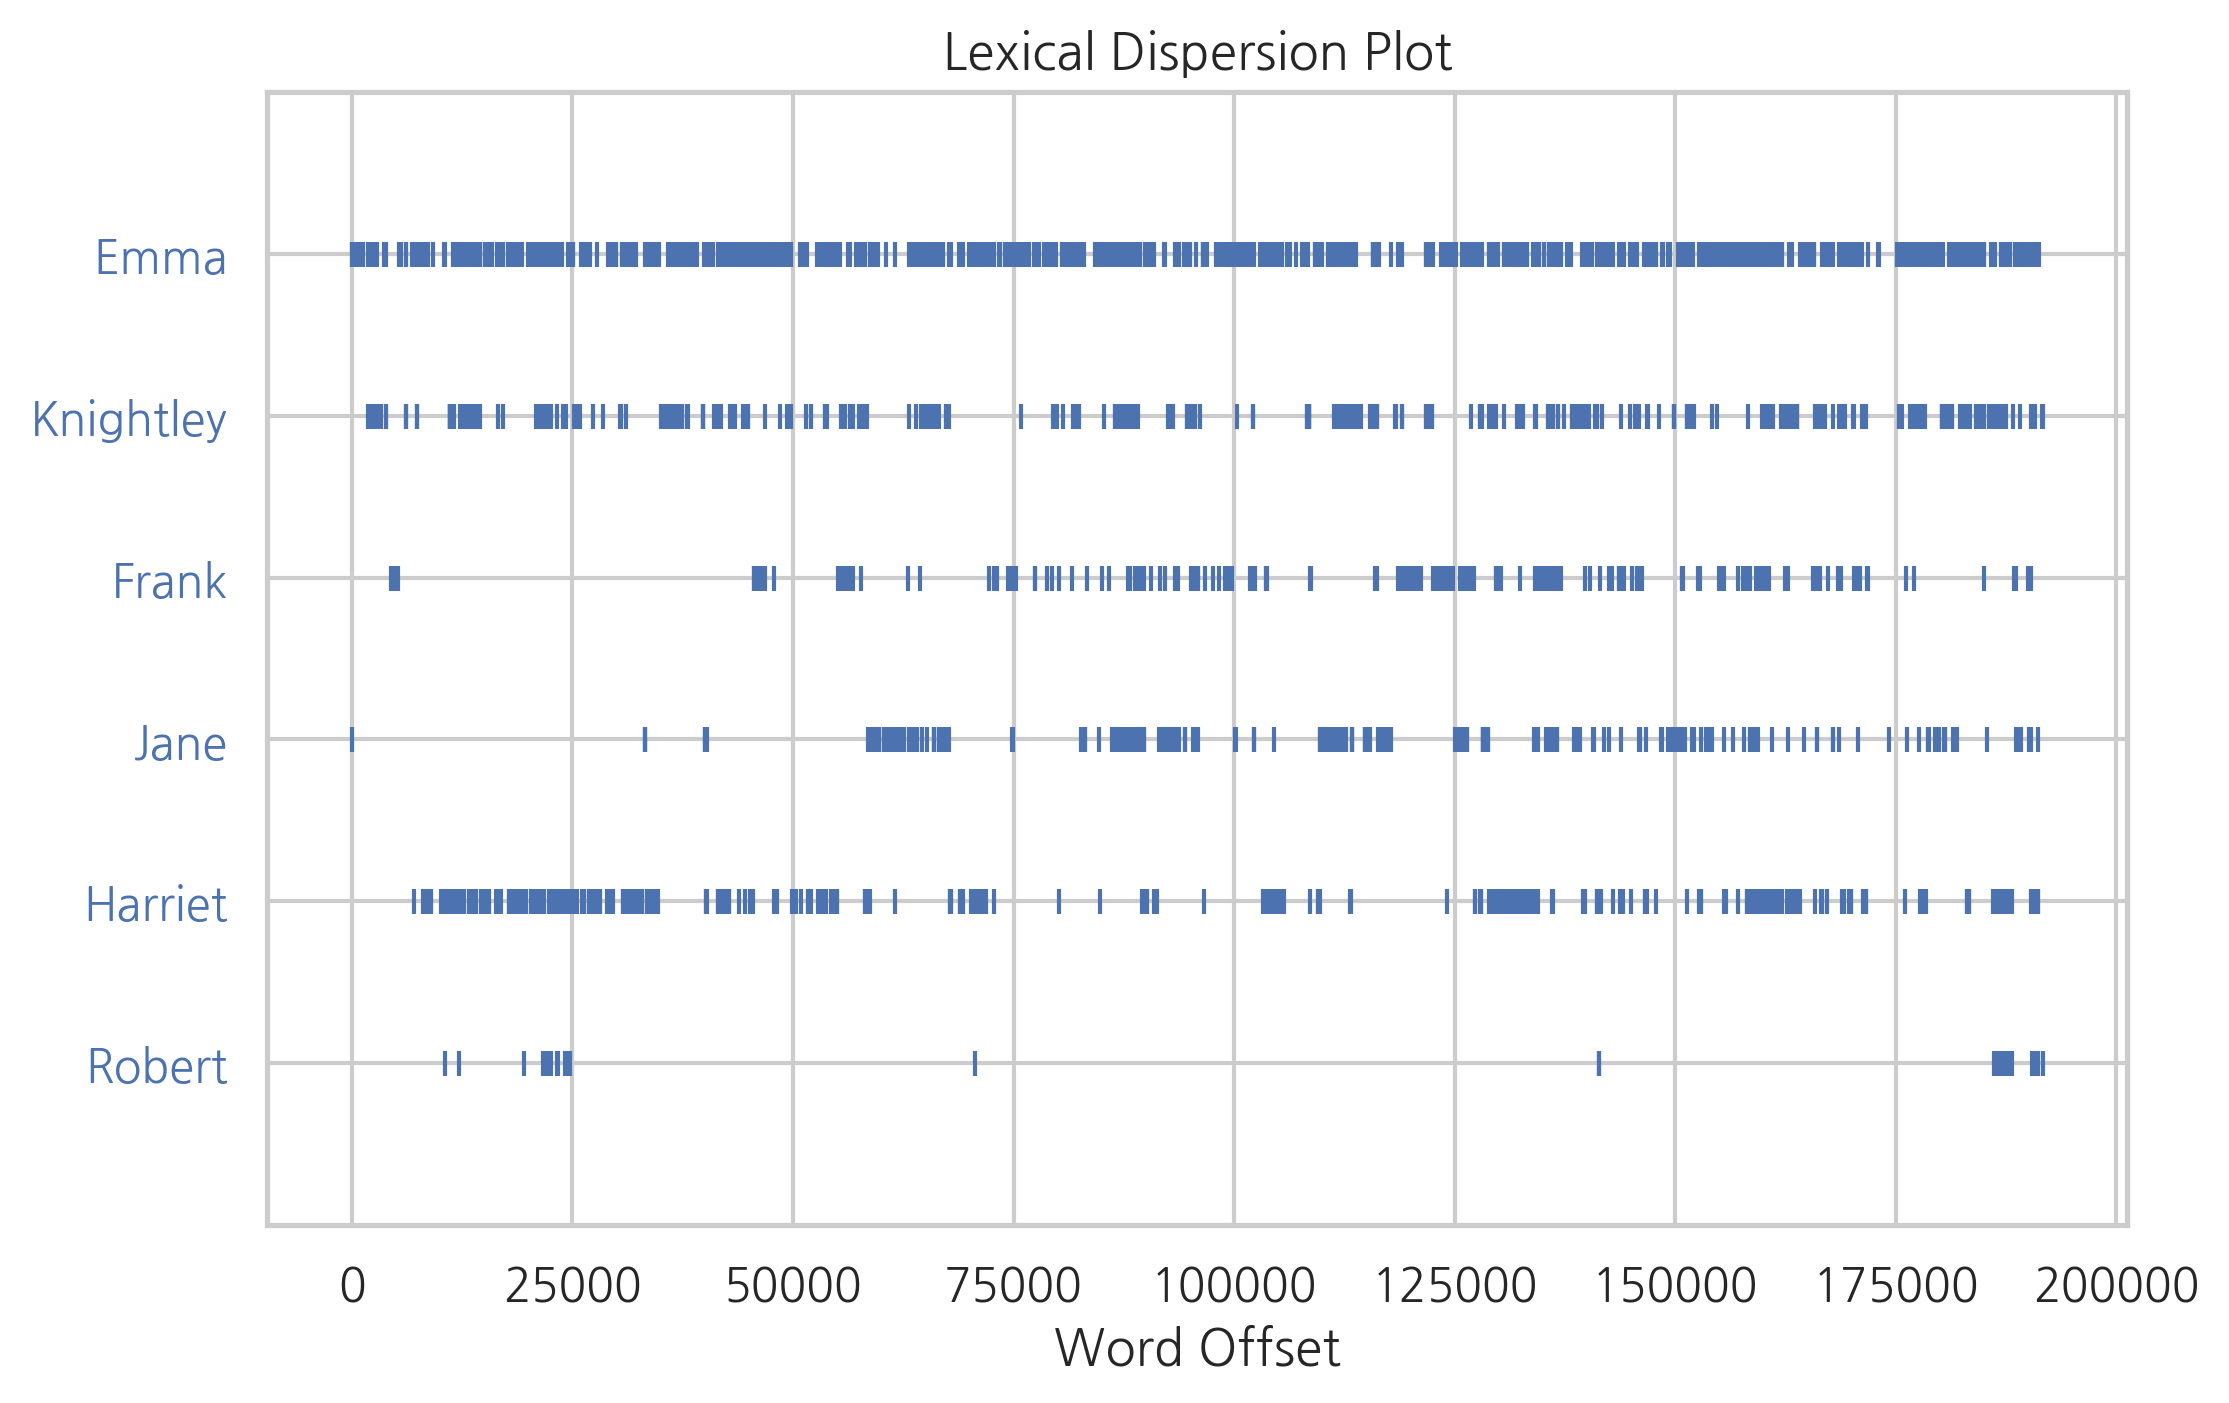

In [14]:
text.dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])

### step 4: 단어 문맥 인쇄

`concordance` 메서드로 단어가 사용된 위치를 직접 표시하면 문맥(context)이 어떤지 볼 수 있다. 여기에서 문맥은 해당 단어의 앞과 뒤에 사용된 단어를 뜻한다.

In [15]:
text.concordance("Emma")

Displaying 25 of 855 matches:
[ Emma by Jane Austen 1816 ] VOLUME I CHAPT
ane Austen 1816 ] VOLUME I CHAPTER I Emma Woodhouse , handsome , clever , and 
both daughters , but particularly of Emma . Between _them_ it was more the int
 friend very mutually attached , and Emma doing just what she liked ; highly e
r own . The real evils , indeed , of Emma 's situation were the power of havin
ding-day of this beloved friend that Emma first sat in mournful thought of any
ing only half a mile from them ; but Emma was aware that great must be the dif
y . It was a melancholy change ; and Emma could not but sigh over it , and wis
 the rest of her life at Hartfield . Emma smiled and chatted as cheerfully as 
able to tell her how we all are . '' Emma spared no exertions to maintain this
 ' I have a great regard for you and Emma ; but when it comes to the question 
ful , troublesome creature ! '' said Emma playfully . `` That is what you have
e few people who could see faults in Emma Woodhouse , and

### step 5: 유사 단어 검색  

`similar` 메서드는 같은 문맥에서 주어진 단어 대신 사용된 횟수가 높은 단어들을 찾는다. 

In [16]:
text.similar("Emma", 1)

she


### step 6: 공통 문맥 인쇄

두 단어의 공통 문맥을 보려면 `common_contexts` 메서드를 사용한다.

In [17]:
text.common_contexts(["Emma", "she"], 1)

but_was


## FreqDist 클래스 

* `FreqDist` 클래스는 문서에 사용된 단어(토큰)의 사용빈도 정보를 담는 클래스이다. 

* `Text` 클래스의 `vocab` 메서드로 추출할 수 있다.

* 토큰 리스트를 넣어서 직접 만들 수도 있다. 


* 빈도 분석에 유용한 여러가지 메서드를 제공한다.

    * `N`: 빈도(횟수)
    * `freq`: 빈도(퍼센트)
    * `most_common`: 가장 많이 나오는 단어
    * `plot`: 가장 많이 나오는 단어 플롯

## 실습 4: FreqDist 클래스 실습

### step 1: Text 클래스에서 생성

In [18]:
fd = text.vocab()
type(fd)

nltk.probability.FreqDist

### step 2: 토큰 리스트에서 생성

* 다음 코드에서는 Emma 말뭉치에서 사람의 이름(NNP)만 모아서 `FreqDist` 클래스 객체를 만들었다. 

* 품사 태그에서 `NNP`(고유대명사)이면서 필요없는 단어(stop words)는 제거하였다.

In [19]:
from nltk import FreqDist

stopwords = ["Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear"]
emma_tokens = pos_tag(word_tokenize(emma_raw))
names_list = [t[0] for t in emma_tokens if t[1] == "NNP" and t[0] not in stopwords]
fd_names = FreqDist(names_list)

### step 3: 단어 빈도 분석

`FreqDist` 클래스는 단어를 키(key), 출현빈도를 값(value)으로 가지는 사전 자료형과 유사하다. 다음 코드는 전체 단어의 수, "Emma"라는 단어의 출현 횟수, 확률을 각각 계산한다.

In [20]:
fd_names.N(), fd_names["Emma"], fd_names.freq("Emma")

(6924, 829, 0.11972848064702483)

`most_common` 메서드를 사용하면 가장 출현 횟수가 높은 단어를 찾는다.

In [21]:
fd_names.most_common(5)

[('Emma', 829),
 ('Harriet', 477),
 ('Weston', 429),
 ('Elton', 374),
 ('Knightley', 373)]

`plot` 메서드를 사용하면 출현 횟수를 시각화한다.

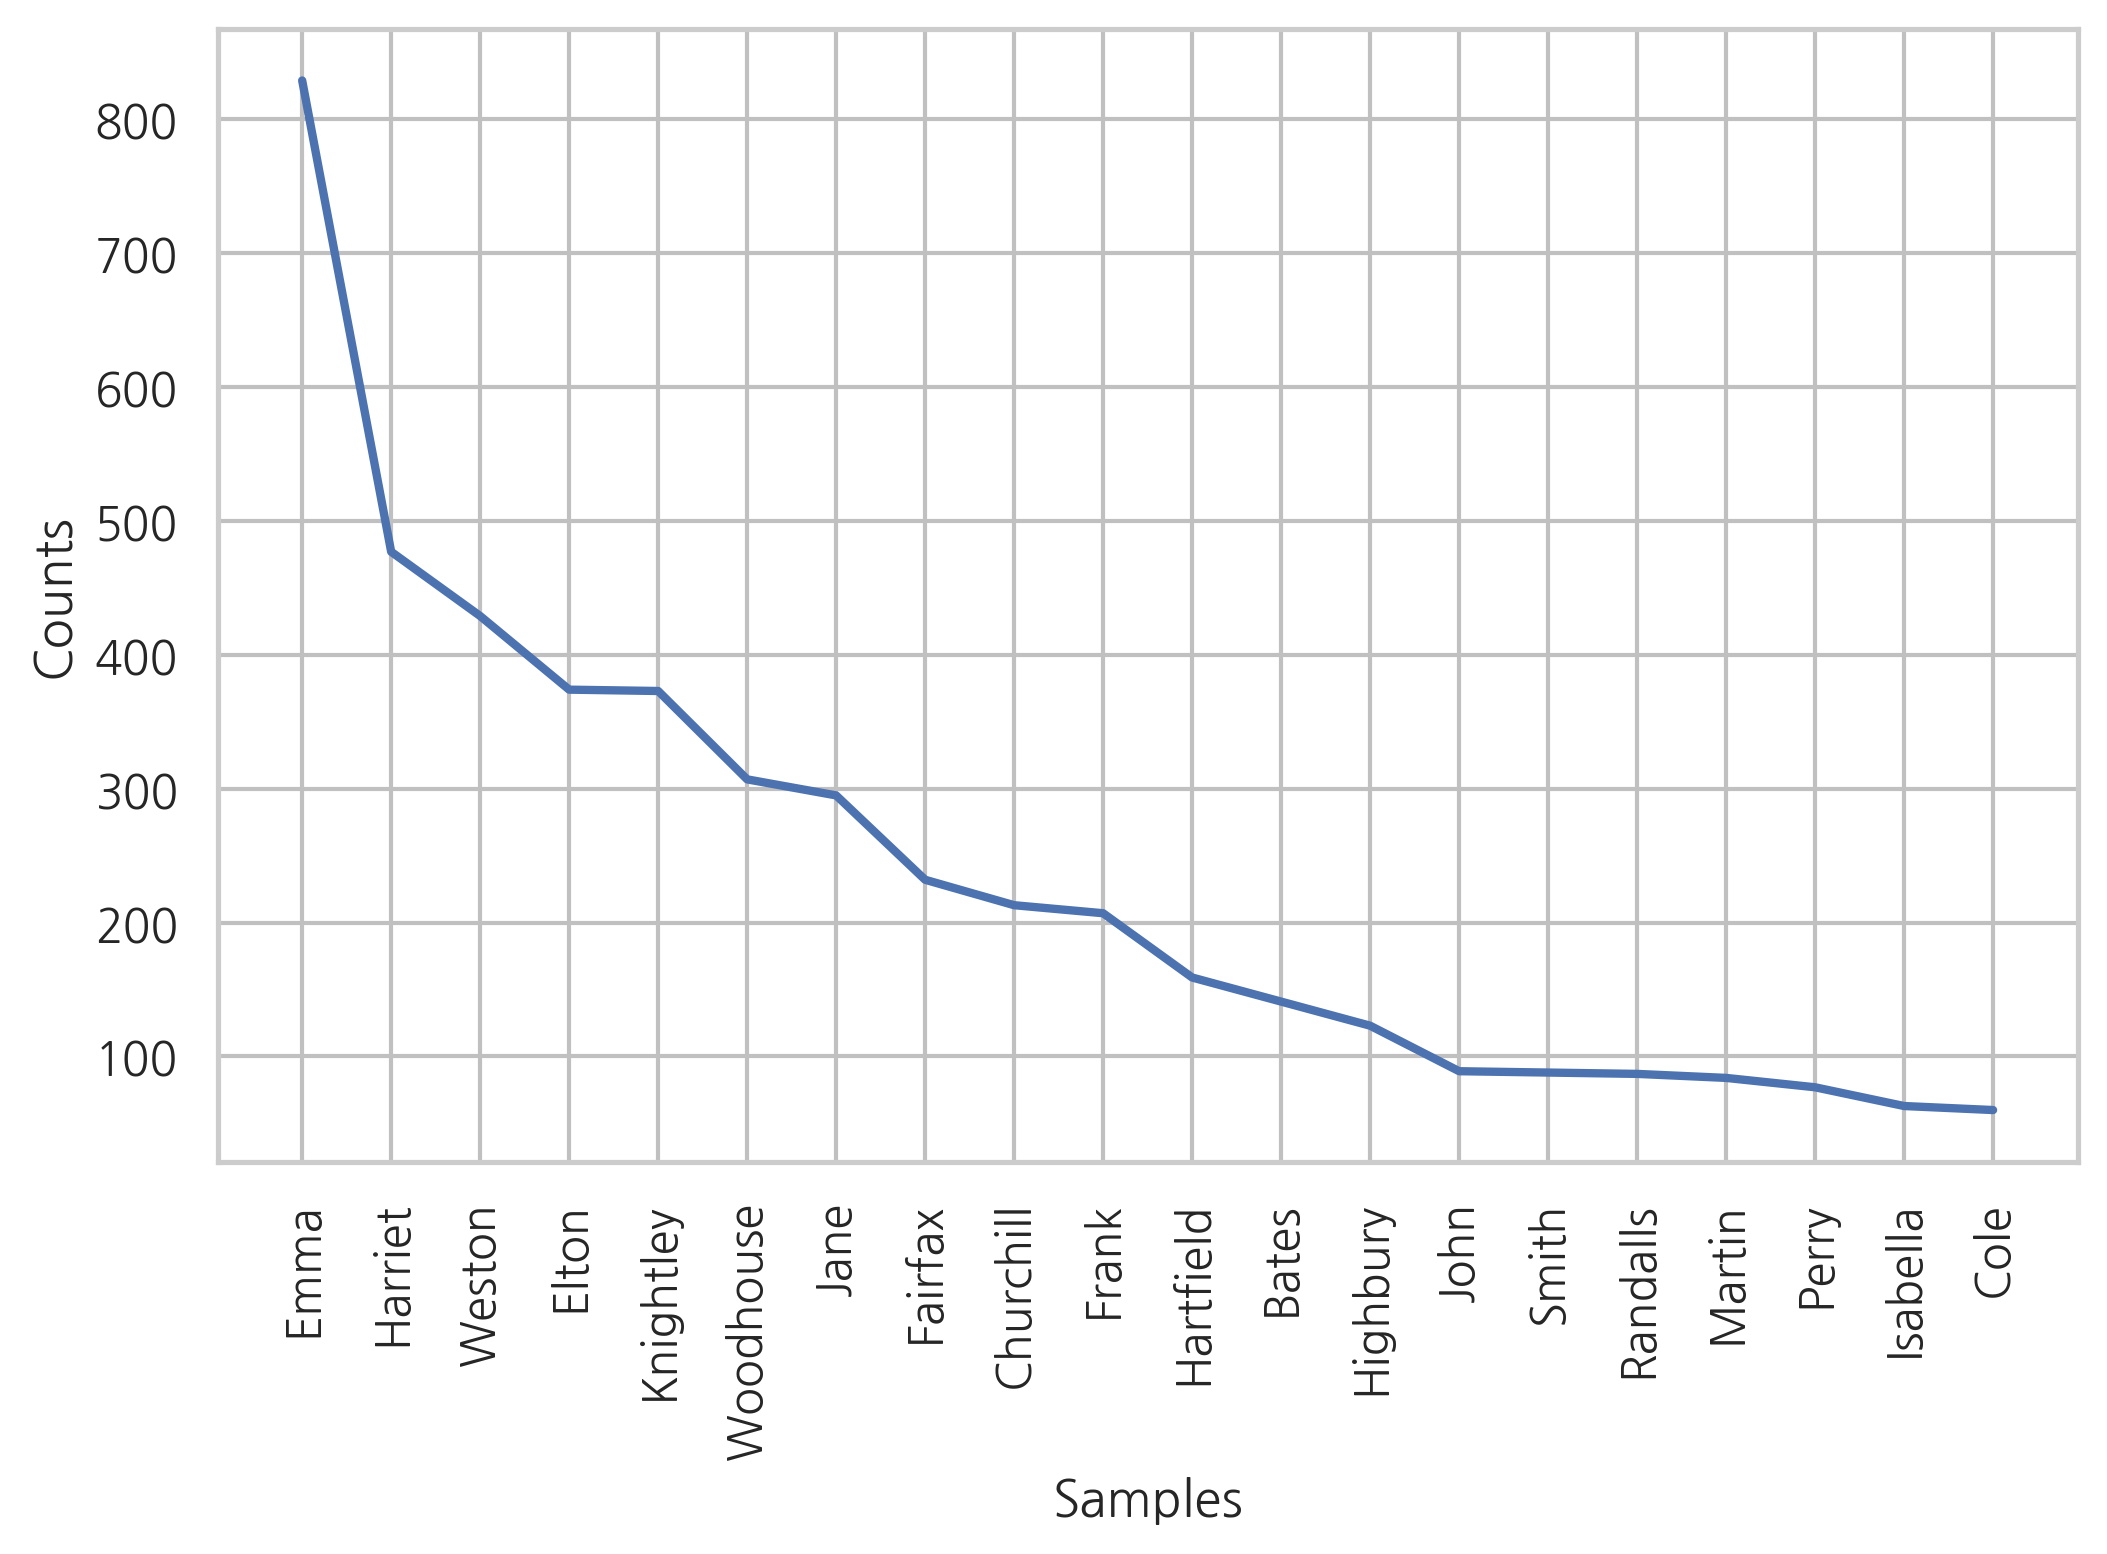

In [22]:
fd_names.plot(20)
plt.show()

## 워드클라우드

wordcloud 패키지를 사용하면 단어의 사용 빈도수에 따라 워드클라우드(Word Cloud) 시각화를 할 수 있다.

## wordcloud 패키지 설치

```
pip install wordcloud
```

또는

```
conda install wordcloud -c conda-forge
```

## "엠마" 등장 인물의 워드 클라우드 제작

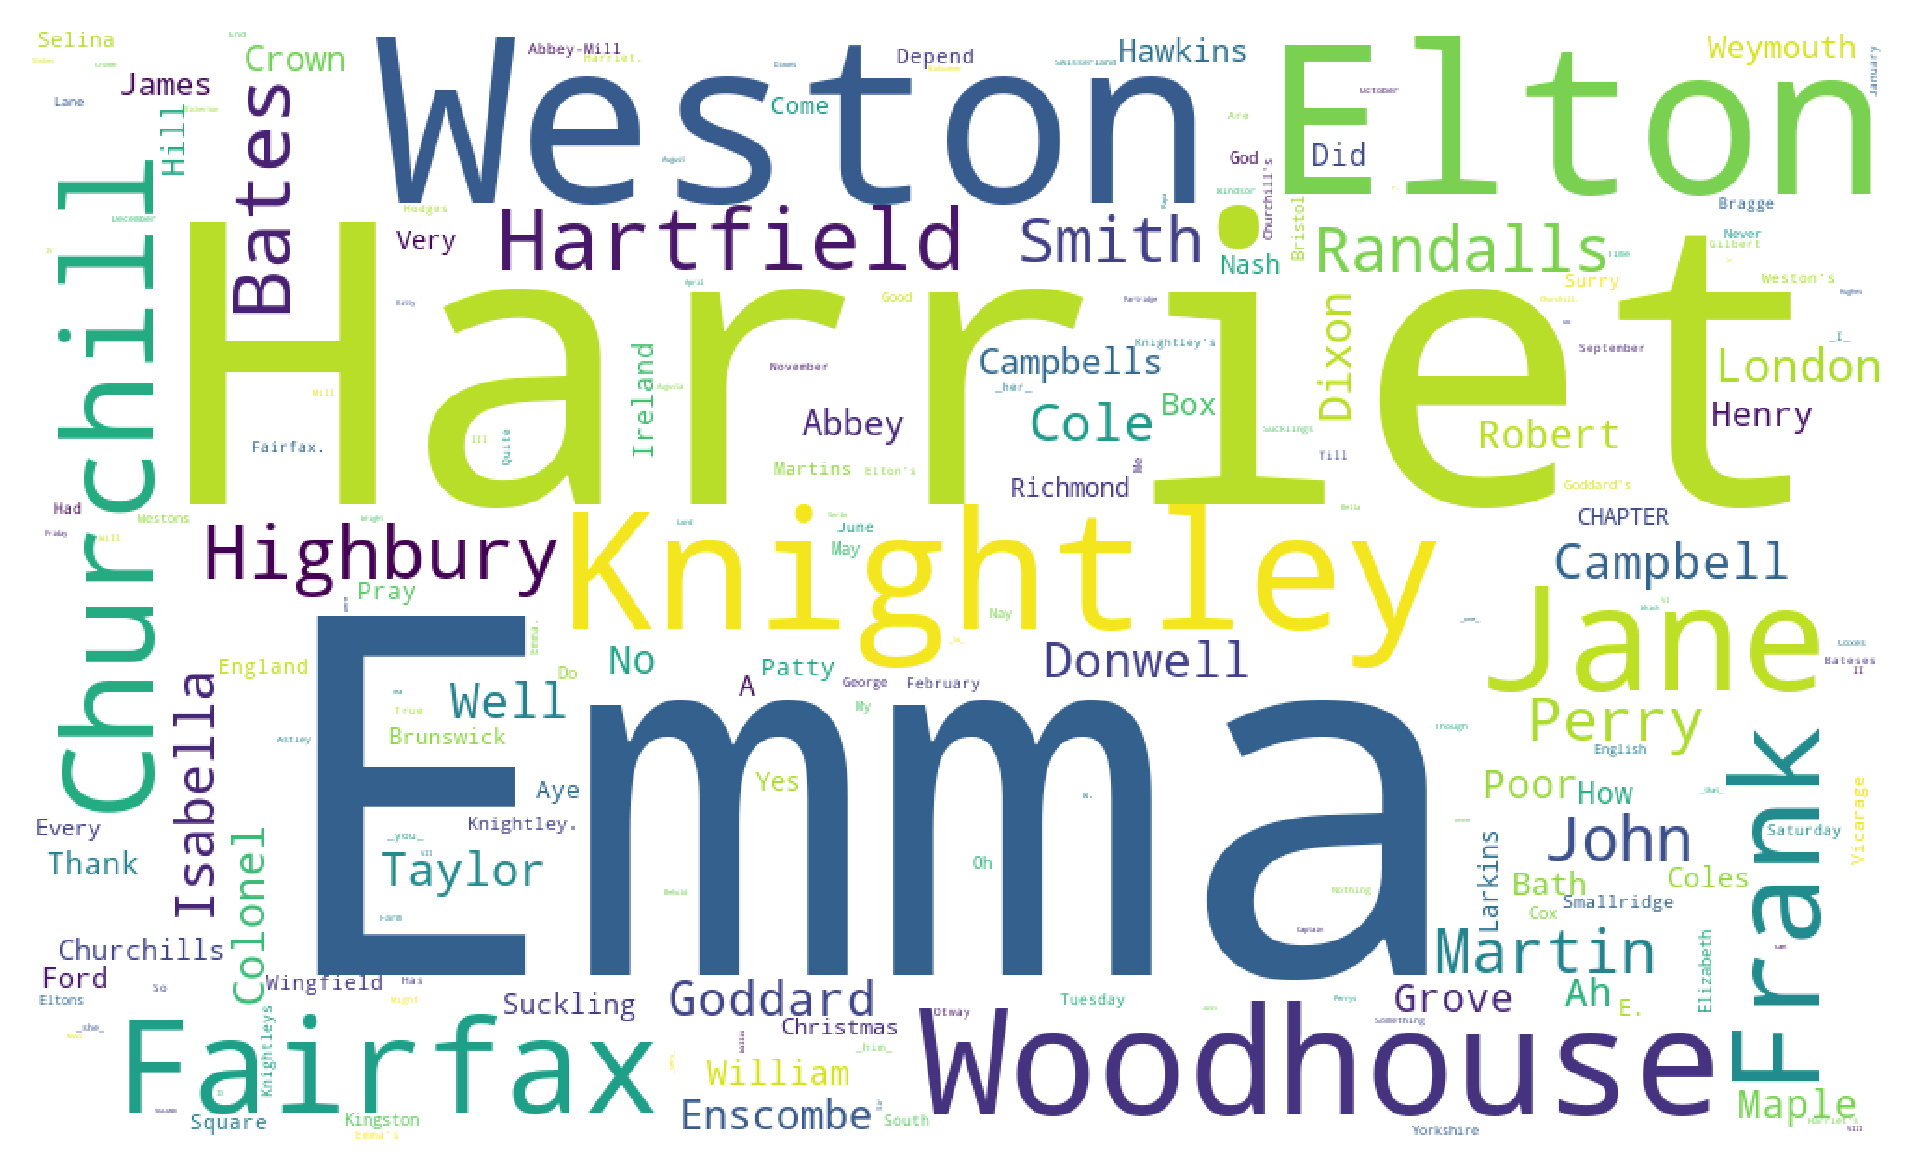

In [23]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis("off")
plt.show()

## 연습 문제: 소설 등장인물 이름 워드클라우드 제작

> 구텐베르그 프로젝트의 소설 말뭉치 중 하나를 골라서 등장인물 이름의 빈도 플롯과 워드클라우드를 제작하라

## 한글 자연어 처리

* KoNLPy 패키지 사용

## KoNLPy 패키지 설치

1. 오라클 홈페이지에 가입하고 JAVA JDK 1.8 다운로드 및 설치
2. 시스템 PATH 및 JAVA_HOME 환경변수 설정
3. JPype1 패키지 설치
```
pip install JPype1
```
4. konlpy 패키지 설치
```
pip install konlpy
```


## KoNLPy 기능

* 샘플 말뭉치

    * `kolaw`: 헌법 말뭉치
    * `kobill`: 법안 말뭉치


* 한글 형태소 분석기 

  * KoNLPy는 다양한 형태소 분석, 태깅 라이브러리를 파이썬에서 쉽게 사용할 수 있도록 모아놓았다.

## 형태소 분석 기능


* Hannanum: 한나눔. KAIST Semantic Web Research Center 개발.
  * http://semanticweb.kaist.ac.kr/hannanum/
* Kkma: 꼬꼬마. 서울대학교 IDS(Intelligent Data Systems) 연구실 개발.
  * http://kkma.snu.ac.kr/
* Komoran: 코모란. Shineware에서 개발.
  * https://github.com/shin285/KOMORAN
* Mecab: 메카브. 일본어용 형태소 분석기를 한국어를 사용할 수 있도록 수정.
  * https://bitbucket.org/eunjeon/mecab-ko
* Open Korean Text: 오픈 소스 한국어 분석기. 과거 트위터 형태소 분석기.
  * https://github.com/open-korean-text/open-korean-text


## 형태소 분석기 기능

* 각 형태소 분석기는 다음과 같은 공통 메서드를 제공


  * `nouns` : 명사 추출
  * `morphs` : 형태소 추출
  * `pos` : 품사 부착

## 실습 5: KoNLPy 사용 

### step 1: 헌법 말뭉치

In [24]:
from konlpy.corpus import kolaw
kolaw.fileids()

['constitution.txt']

In [25]:
c = kolaw.open('constitution.txt').read()
print(c[:450])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       


### step 2: 법안 말뭉치

In [26]:
from konlpy.corpus import kobill
kobill.fileids()

['1809895.txt',
 '1809890.txt',
 '1809899.txt',
 '1809898.txt',
 '1809891.txt',
 '1809892.txt',
 '1809894.txt',
 '1809893.txt',
 '1809896.txt',
 '1809897.txt']

In [27]:
d = kobill.open('1809890.txt').read()
print(d[:400])

지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호

9890

발의연월일 : 2010.  11.  12.  

발  의  자 : 정의화․이명수․김을동 

이사철․여상규․안규백

황영철․박영아․김정훈

김학송 의원(10인)

제안이유 및 주요내용

  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요

한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 

수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 

자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 

이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.

  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려

는 것임(안 제63조제2항제4호).



### step 3: 형태소 분석기 생성

In [28]:
from konlpy.tag import *

hannanum = Hannanum()
kkma = Kkma()
okt = Okt()

# 다음 형태소 분석기는 자바 등의 연결에 따라 안될 수도 있다.
komoran = Komoran()
mecab = Mecab()

### step 4: 명사 추출

* 문서에서 명사만 추출하려면 `nouns` 메서드 사용

In [29]:
hannanum.nouns(c[:40])

['대한민국헌법', '유구', '역사', '전통', '빛', '우리', '대한국민', '3·1운동']

In [30]:
kkma.nouns(c[:40])

['대한',
 '대한민국',
 '대한민국헌법',
 '민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '3',
 '1',
 '1운동',
 '운동']

In [31]:
okt.nouns(c[:40])

['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동']

### step 5: 형태소 추출

* 명사 뿐 아니라 모든 품사의 형태소를 알아내려면 `morphs` 메서드 사용

In [32]:
hannanum.morphs(c[:40])

['대한민국헌법',
 '유구',
 '하',
 'ㄴ',
 '역사',
 '와',
 '전통',
 '에',
 '빛',
 '나는',
 '우리',
 '대한국민',
 '은',
 '3·1운동',
 '으로']

In [33]:
kkma.morphs(c[:40])

['대한민국',
 '헌법',
 '유구',
 '하',
 'ㄴ',
 '역사',
 '와',
 '전통',
 '에',
 '빛나',
 '는',
 '우리',
 '대하',
 'ㄴ',
 '국민',
 '은',
 '3',
 '·',
 '1',
 '운동',
 '으로']

In [34]:
okt.morphs(c[:40])

['대한민국',
 '헌법',
 '\n\n',
 '유구',
 '한',
 '역사',
 '와',
 '전통',
 '에',
 '빛나는',
 '우리',
 '대',
 '한',
 '국민',
 '은',
 '3',
 '·',
 '1',
 '운동',
 '으로']

### step 6: 품사 부착

* `pos` 명령을 사용하면 품사 부착을 한다.

* 한국어 품사 태그세트로는 형태소 분석기마다 사용하는 품사 태그가 다르므로 각 형태소 분석기에 대한 문서를 참조한다.

* 부착되는 품사 태그의 기호와 의미는 `tagset` 속성으로 확인할 수 있다.

In [35]:
hannanum.pos(c[:40])

[('대한민국헌법', 'N'),
 ('유구', 'N'),
 ('하', 'X'),
 ('ㄴ', 'E'),
 ('역사', 'N'),
 ('와', 'J'),
 ('전통', 'N'),
 ('에', 'J'),
 ('빛', 'N'),
 ('나는', 'J'),
 ('우리', 'N'),
 ('대한국민', 'N'),
 ('은', 'J'),
 ('3·1운동', 'N'),
 ('으로', 'J')]

In [36]:
hannanum.tagset

{'E': '어미',
 'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ET': '전성 어미',
 'F': '외국어',
 'I': '독립언',
 'II': '감탄사',
 'J': '관계언',
 'JC': '격조사',
 'JP': '서술격 조사',
 'JX': '보조사',
 'M': '수식언',
 'MA': '부사',
 'MM': '관형사',
 'N': '체언',
 'NB': '의존명사',
 'NC': '보통명사',
 'NN': '수사',
 'NP': '대명사',
 'NQ': '고유명사',
 'P': '용언',
 'PA': '형용사',
 'PV': '동사',
 'PX': '보조 용언',
 'S': '기호',
 'X': '접사',
 'XP': '접두사',
 'XS': '접미사'}

In [37]:
kkma.pos(c[:40])

[('대한민국', 'NNG'),
 ('헌법', 'NNG'),
 ('유구', 'NNG'),
 ('하', 'XSV'),
 ('ㄴ', 'ETD'),
 ('역사', 'NNG'),
 ('와', 'JC'),
 ('전통', 'NNG'),
 ('에', 'JKM'),
 ('빛나', 'VV'),
 ('는', 'ETD'),
 ('우리', 'NNM'),
 ('대하', 'VV'),
 ('ㄴ', 'ETD'),
 ('국민', 'NNG'),
 ('은', 'JX'),
 ('3', 'NR'),
 ('·', 'SP'),
 ('1', 'NR'),
 ('운동', 'NNG'),
 ('으로', 'JKM')]

In [38]:
kkma.tagset

{'EC': '연결 어미',
 'ECD': '의존적 연결 어미',
 'ECE': '대등 연결 어미',
 'ECS': '보조적 연결 어미',
 'EF': '종결 어미',
 'EFA': '청유형 종결 어미',
 'EFI': '감탄형 종결 어미',
 'EFN': '평서형 종결 어미',
 'EFO': '명령형 종결 어미',
 'EFQ': '의문형 종결 어미',
 'EFR': '존칭형 종결 어미',
 'EP': '선어말 어미',
 'EPH': '존칭 선어말 어미',
 'EPP': '공손 선어말 어미',
 'EPT': '시제 선어말 어미',
 'ET': '전성 어미',
 'ETD': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JK': '조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKI': '호격 조사',
 'JKM': '부사격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JX': '보조사',
 'MA': '부사',
 'MAC': '접속 부사',
 'MAG': '일반 부사',
 'MD': '관형사',
 'MDN': '수 관형사',
 'MDT': '일반 관형사',
 'NN': '명사',
 'NNB': '일반 의존 명사',
 'NNG': '보통명사',
 'NNM': '단위 의존 명사',
 'NNP': '고유명사',
 'NP': '대명사',
 'NR': '수사',
 'OH': '한자',
 'OL': '외국어',
 'ON': '숫자',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'UN': '명사추정범주',
 'VA': '형용사',
 'VC': '지정사',
 'VCN': "부정 지정사, 형용사 '아니다'",
 'VC

In [39]:
okt.pos(c[:40])

[('대한민국', 'Noun'),
 ('헌법', 'Noun'),
 ('\n\n', 'Foreign'),
 ('유구', 'Noun'),
 ('한', 'Josa'),
 ('역사', 'Noun'),
 ('와', 'Josa'),
 ('전통', 'Noun'),
 ('에', 'Josa'),
 ('빛나는', 'Verb'),
 ('우리', 'Noun'),
 ('대', 'Modifier'),
 ('한', 'Modifier'),
 ('국민', 'Noun'),
 ('은', 'Josa'),
 ('3', 'Number'),
 ('·', 'Punctuation'),
 ('1', 'Number'),
 ('운동', 'Noun'),
 ('으로', 'Josa')]

In [40]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

### step 7: 빈도 분석

* NLTK의 기능을 사용하여 한극 빈도 분석 가능

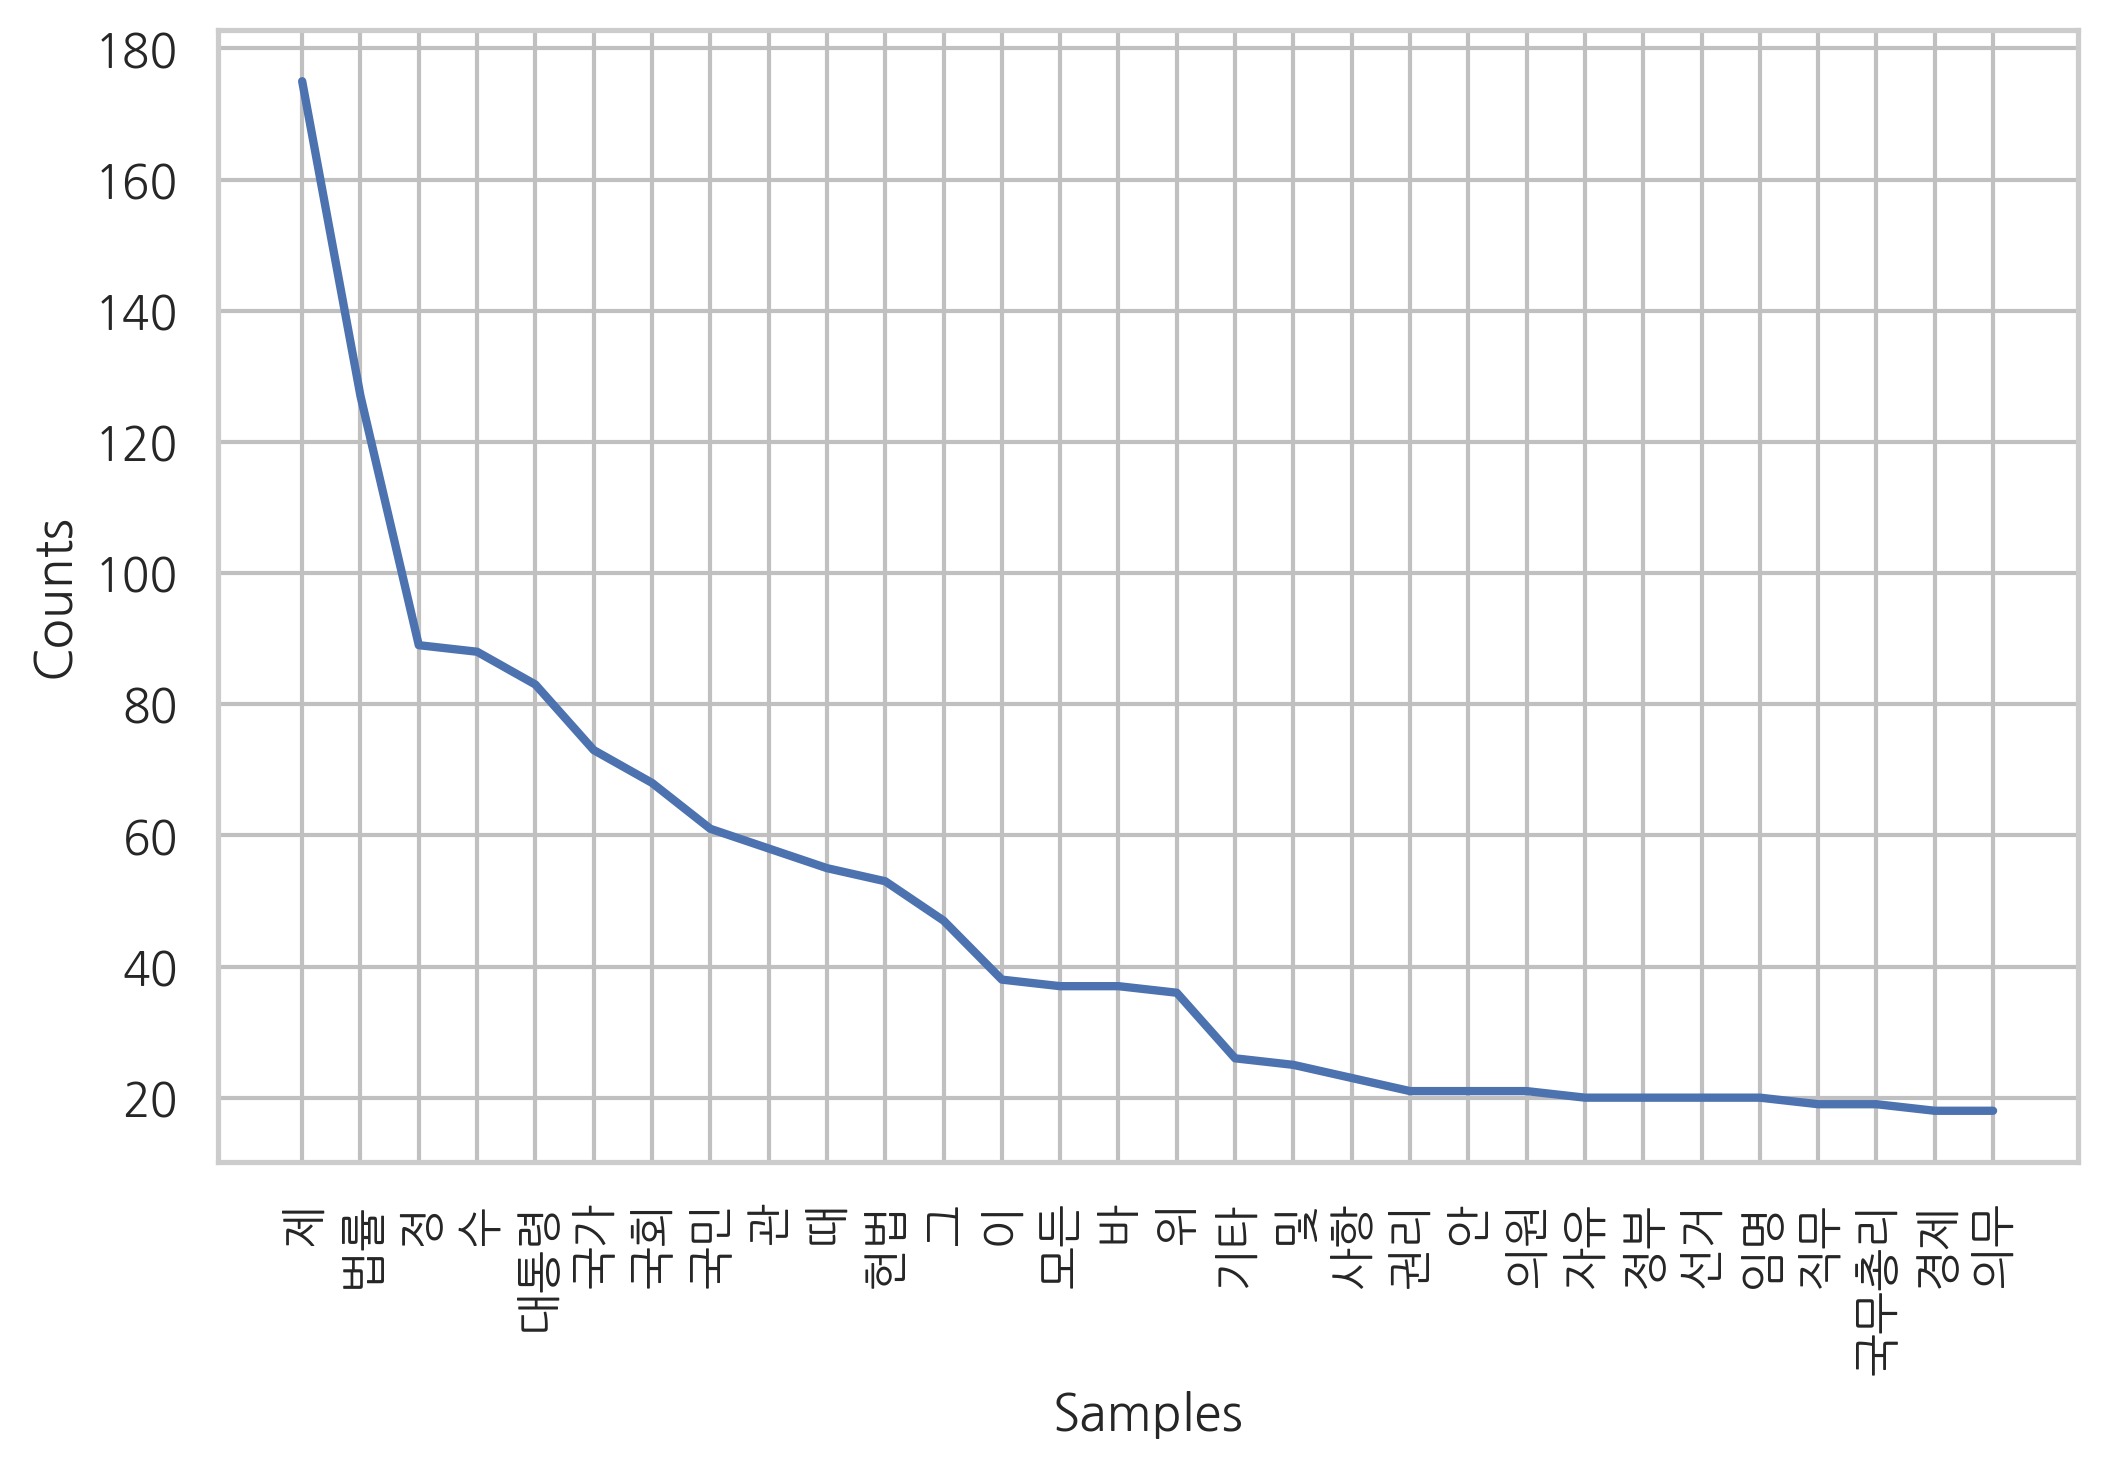

In [41]:
from nltk import Text

kolaw = Text(okt.nouns(c))
kolaw.plot(30)
plt.show()

### step 8: 한글 워드클라우드

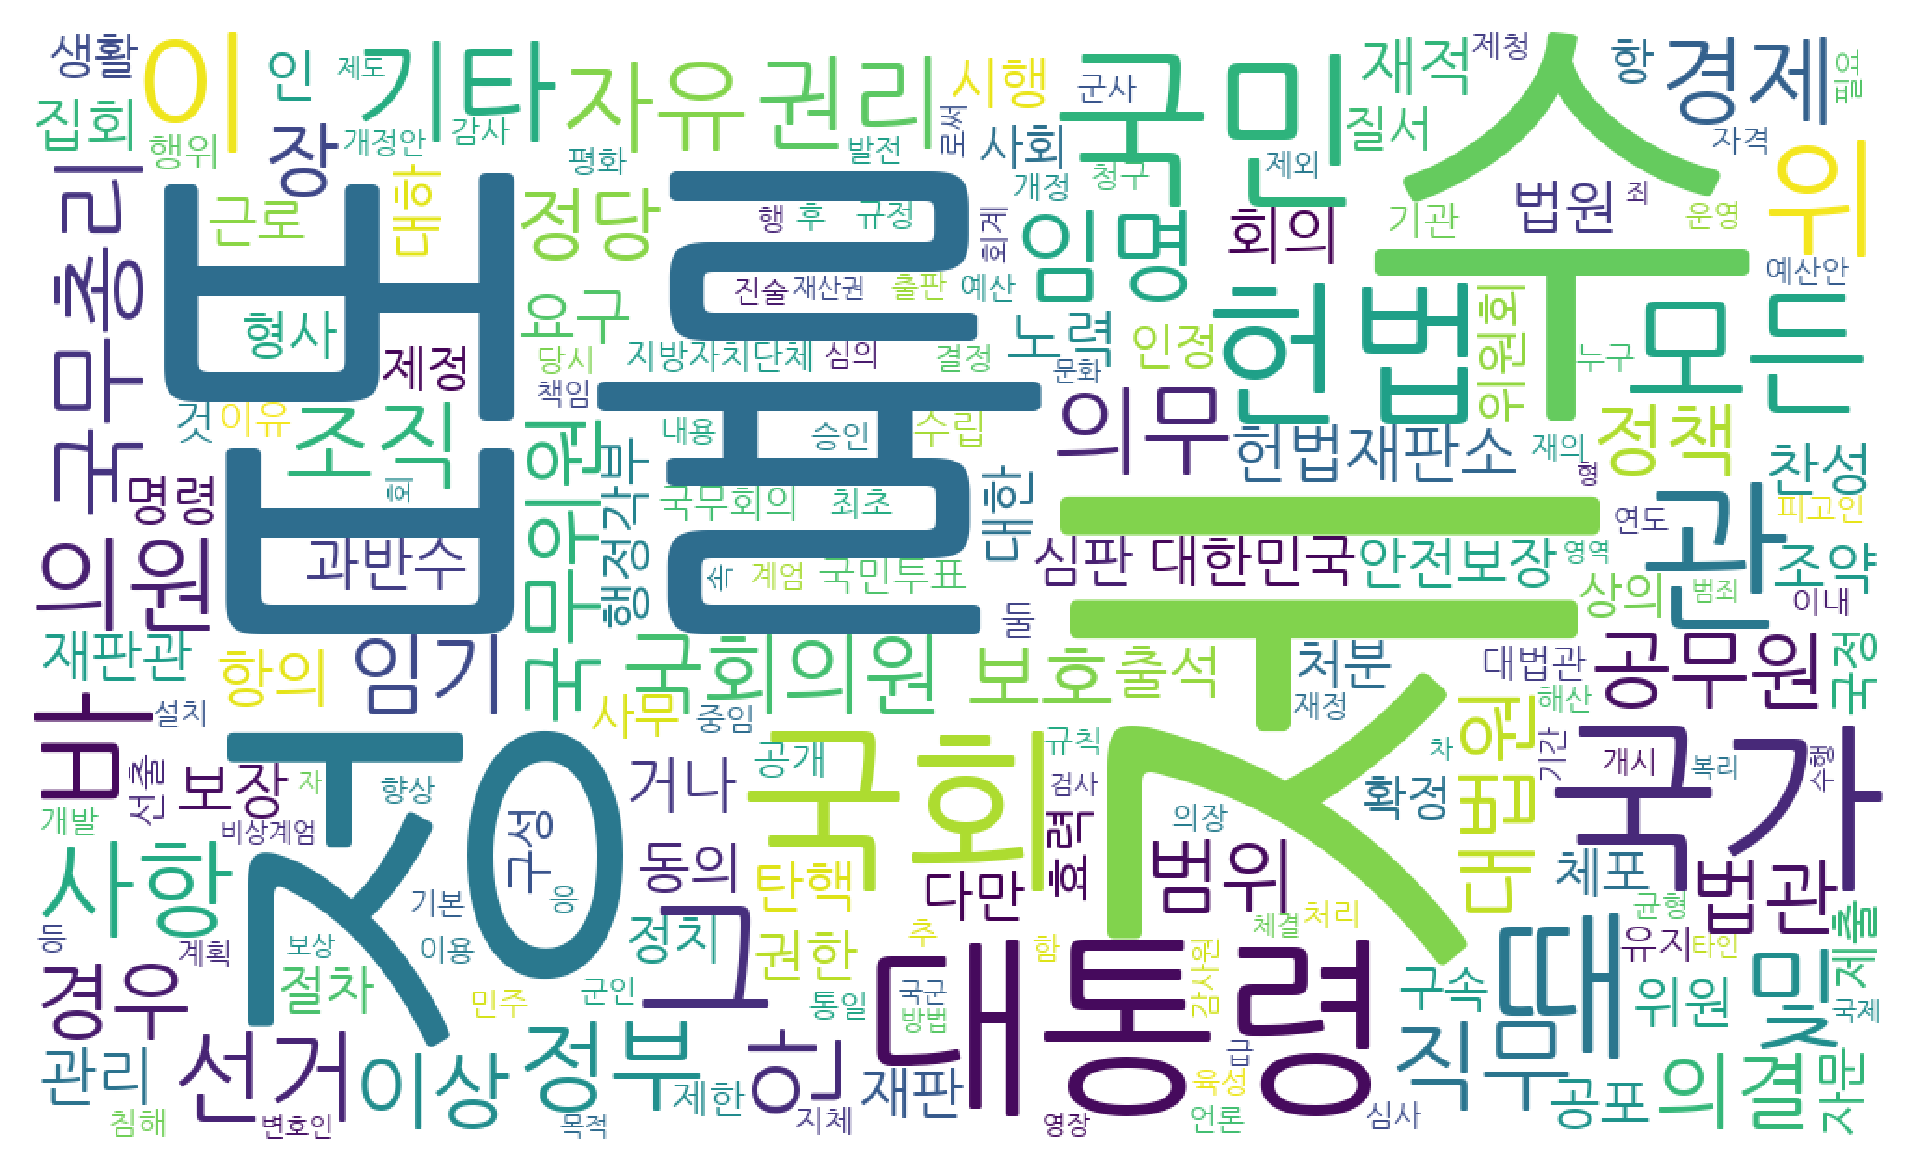

In [42]:
from wordcloud import WordCloud

# 자신의 컴퓨터 환경에 맞는 한글 ttf 폰트 경로를 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# 윈도우의 경우는 다음 경로 사용
# font_path = 'C:/Windows/Fonts/malgun.ttf'

wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(kolaw.vocab()))
plt.axis("off")
plt.show()

## 확률론적 언어 모형

$m$개의 단어열(word sequence)

$$ w_1, w_2, \ldots, w_m $$ 

이 주어졌을 때 이 단어열이 실제 사용되는 문장으로써 성립될 확률 

$$ P(w_1, w_2, \ldots, w_m) $$ 

을 계산하여 실제로 현실에서 사용될 수 있는 문장(sentence)인지를 판별하는 모형이다.


## 확률론적 언어 모형의 활용

확률론적 언어 모형은 다음과 같은 분야에 광범위하게 활용할 수 있다.

* 철자 및 문법 교정(Spell Correction)
* 음성 인식(Speech Recognition)
* 자동 번역(Machine Translation)
* 자동 요약(Summarization)
* 챗봇(Question-Answering)

## 일반적 문장 확률

* 문장 확률은 조건부 확률의 곱


$$
\begin{eqnarray}
P(w_1, w_2, \ldots, w_m) &=& P(w_1, w_2, \ldots, w_{m-1}) \cdot P(w_m\;|\; w_1, w_2, \ldots, w_{m-1}) \\
&=& P(w_1, w_2, \ldots, w_{m-2}) \cdot P(w_{m-1}\;|\; w_1, w_2, \ldots, w_{m-2}) \cdot P(w_m\;|\; w_1, w_2, \ldots, w_{m-1}) \\
&=& P(w_1) \cdot P(w_2 \;|\; w_1) \cdot  P(w_3 \;|\; w_1, w_2) P(w_4 \;|\; w_1, w_2, w_3) \cdots P(w_m\;|\; w_1, w_2, \ldots, w_{m-1})
\end{eqnarray}
$$


## 조건부 확률


$$ P(w_m\;|\; w_1, w_2, \ldots, w_{m-1}) $$ 



* 지금까지 $w_1, w_2, \ldots, w_{m-1}$라는 단어 열이 나왔을 때, 

* 그 다음 단어로 $w_m$이 나올 조건부 확률을 말한다. 

* 여기에서 지금까지 나온 단어를 **문맥(context)** 정보라고 한다.






## N-그램 조건부 확률

* 문맥을 이루는 단어의 수가 많으면 조건부 확률의 개수가 너무 많아짐
* 현실적으로 조건부 확률을 계산 및 저장할 수 없음



* 따라서 다음과 같은 간략화 모형을 주로 사용

  * 유니그램 모형(Unigram Model)
  * 바이그램 모형(Bigram Model)

## 유니그램 모형

만약 모든 단어의 활용이 완전히 서로 독립이라면 단어 열의 확률은 다음과 같이 각 단어의 확률의 곱이 된다. 이러한 모형을 유니그램 모형이라고 한다.

$$ P(w_1, w_2, \ldots, w_m) = \prod_{i=1}^m P(w_i) $$

## 바이그램 모형

만약 단어의 활용이 바로 전 단어에만 의존한다면 단어 열의 확률은 다음과 같다. 이러한 모형을 바이그램 모형 또는 마코프 모형(Markov Model)이라고 한다.

$$ P(w_1, w_2, \ldots, w_m) = P(w_1) \prod_{i=2}^{m} P(w_{i}\;|\; w_{i-1}) $$

## NLTK 패키지의 바이그램 모형

* `ngram` 명령으로 문장을 바이그램 분해
* `ConditionalFreqDist` 클래스로 각 문맥별 단어 빈도를 측정
* `ConditionalProbDist` 클래스로 조건부 확률을 추정한다.

## 실습 6: NLTK로 바이그램 모형 제작

### step 1: 말뭉치 바이그램 토큰화

In [43]:
from nltk.corpus import movie_reviews
from nltk.util import ngrams

sentences = []
for tokens in movie_reviews.sents():
    bigram = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol="SS", right_pad_symbol="SE")
    sentences += [t for t in bigram]

sentences[:17]

[('SS', 'plot'),
 ('plot', ':'),
 (':', 'two'),
 ('two', 'teen'),
 ('teen', 'couples'),
 ('couples', 'go'),
 ('go', 'to'),
 ('to', 'a'),
 ('a', 'church'),
 ('church', 'party'),
 ('party', ','),
 (',', 'drink'),
 ('drink', 'and'),
 ('and', 'then'),
 ('then', 'drive'),
 ('drive', '.'),
 ('.', 'SE')]

### step 2: `ConditionalFreqDist` 클래스 객체 생성

In [44]:
from nltk import ConditionalFreqDist

cfd = ConditionalFreqDist(sentences)

*  문장의 처음에 올 수 있는 단어들

In [45]:
cfd["SS"].most_common(5)

[('the', 8071), ('.', 3173), ('it', 3136), ('i', 2471), ('but', 1814)]

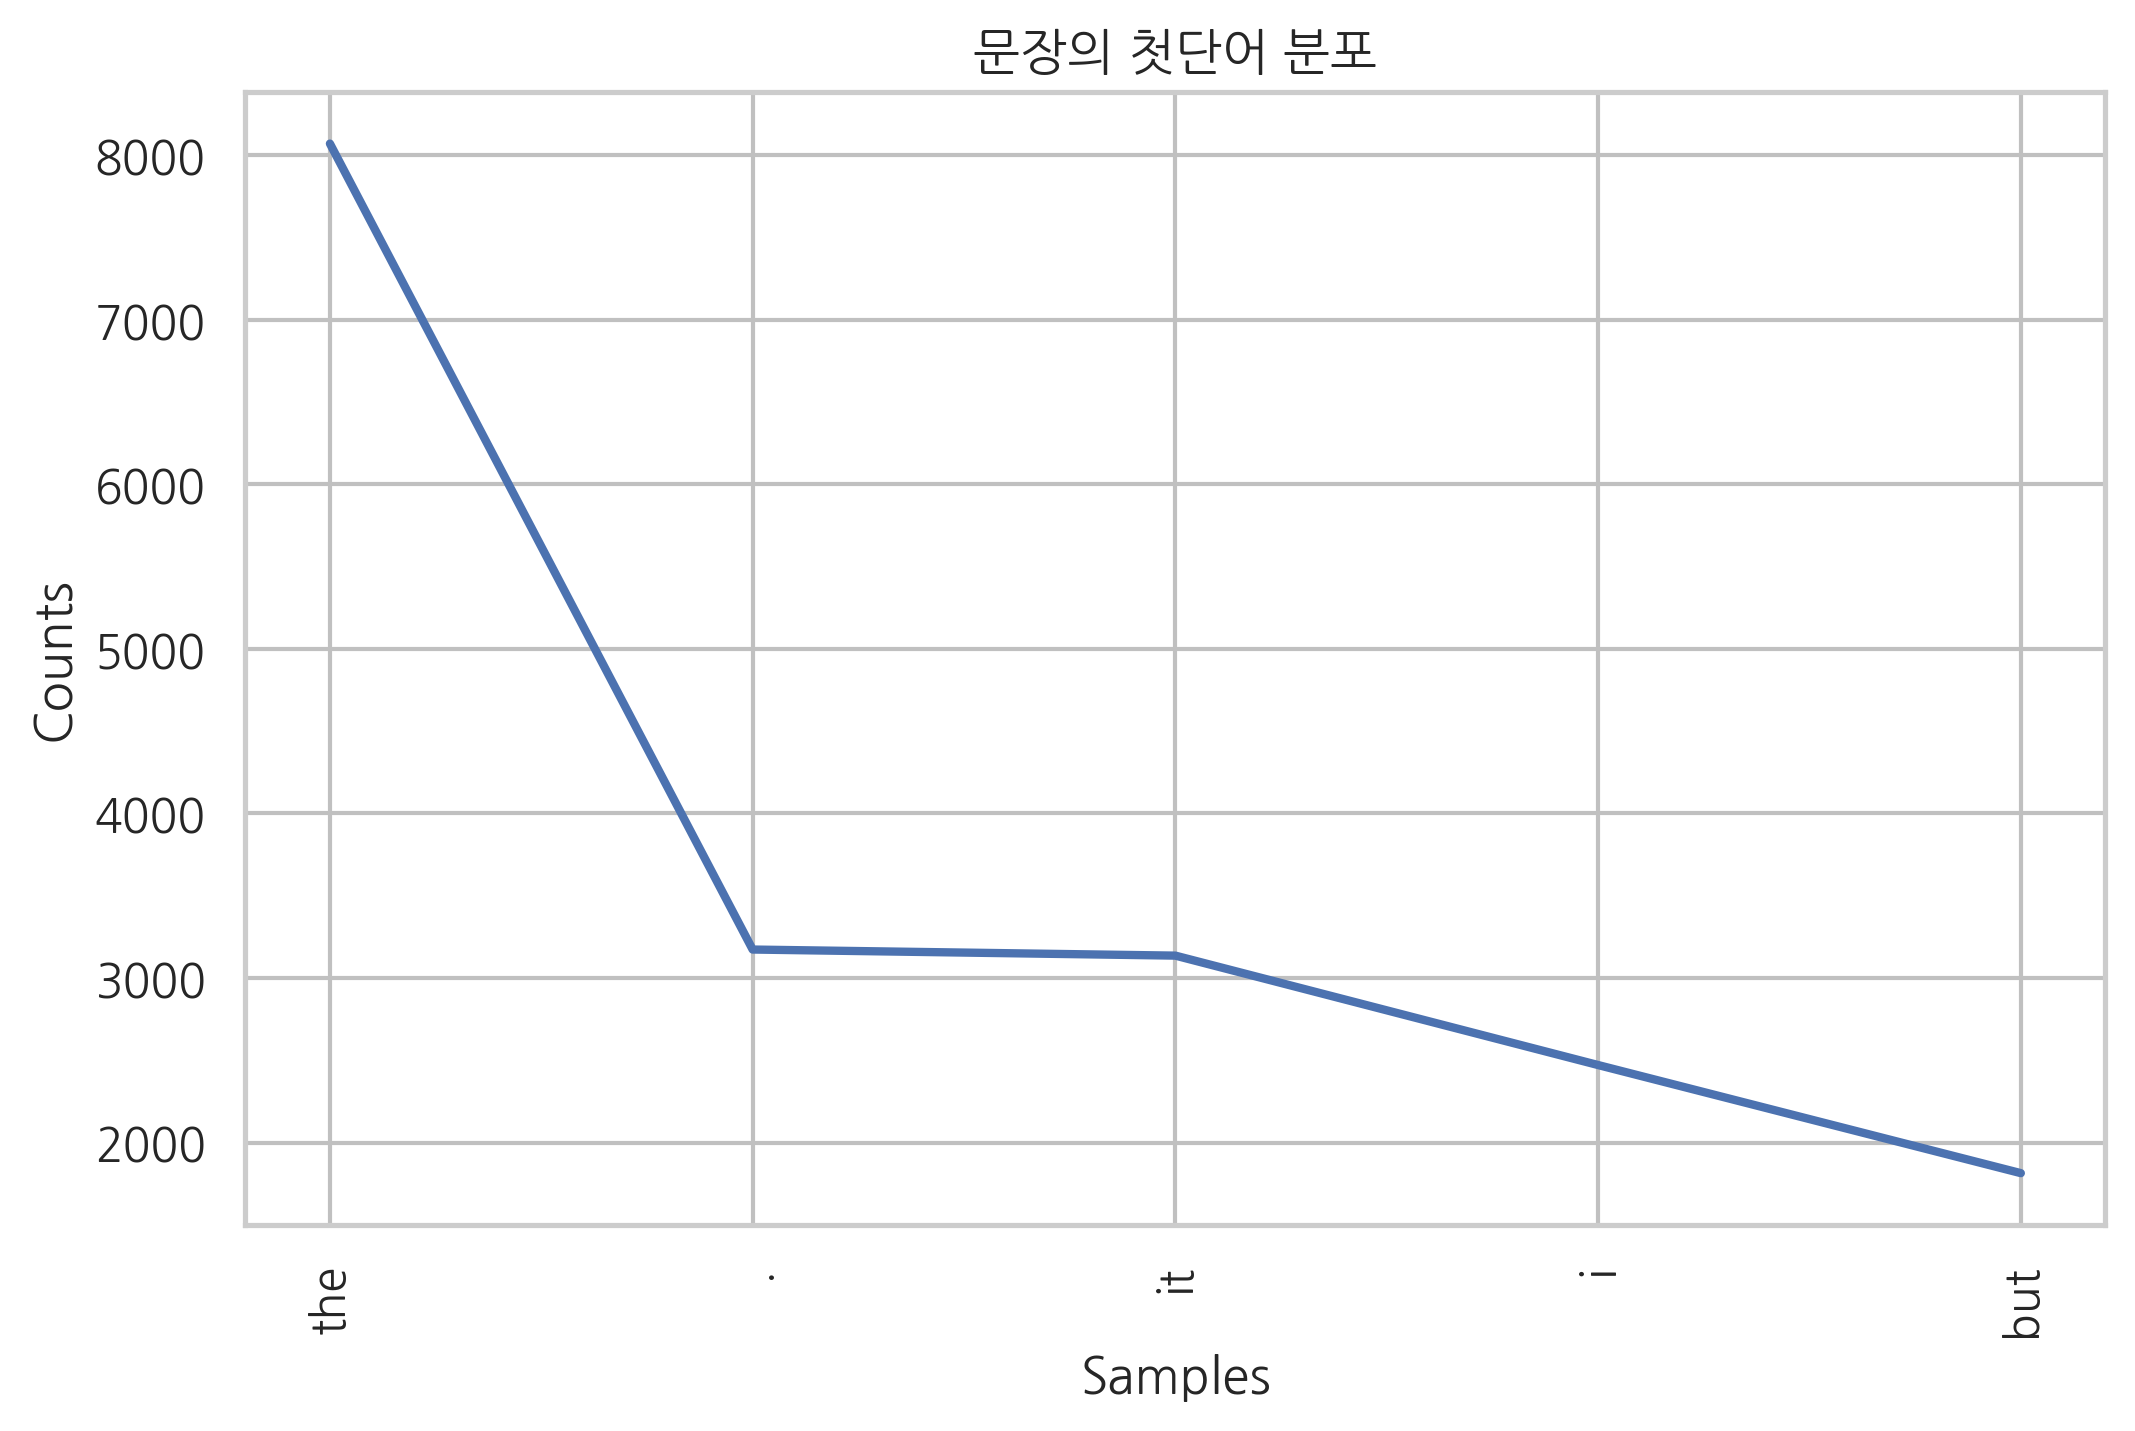

In [46]:
cfd["SS"].plot(5, title="문장의 첫단어 분포")
plt.show()

* i 다음에 올 수 있는 단어들

In [47]:
cfd["i"].most_common(5)

[("'", 1357), ('was', 506), ('can', 351), ('have', 330), ('don', 276)]

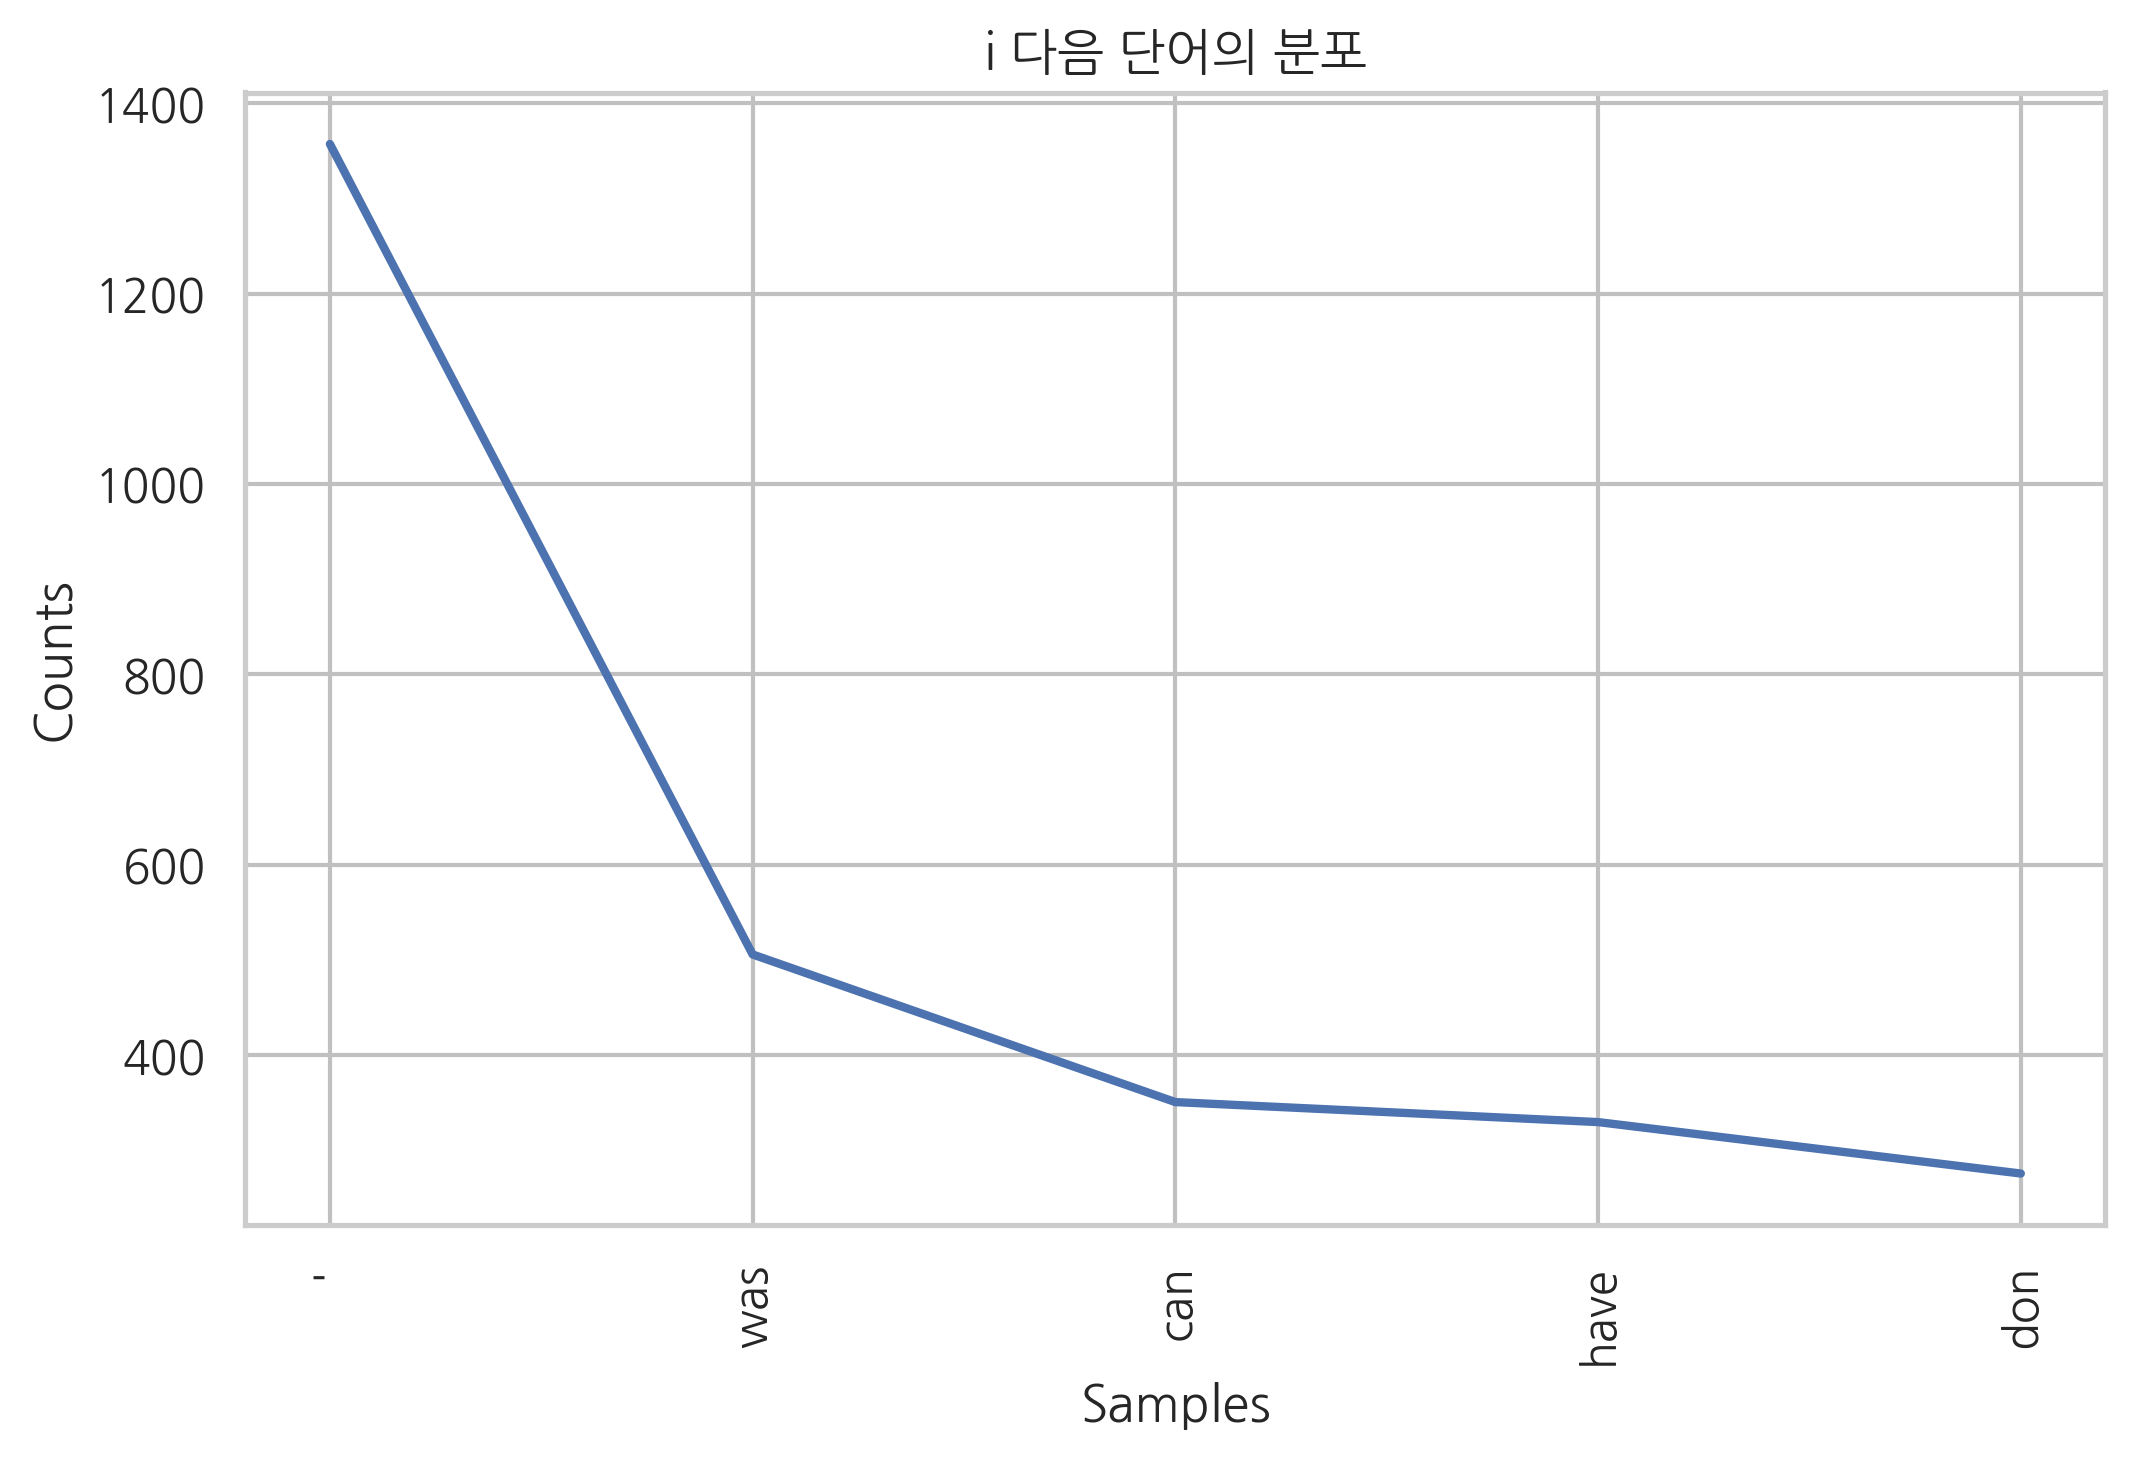

In [48]:
cfd["i"].plot(5, title="i 다음 단어의 분포")
plt.show()

* 마침표 다음에 올 수 있는 단어들

In [49]:
cfd["."].most_common(5)

[('SE', 63404), ('"', 1854), (')', 535), ("'", 70), (']', 10)]

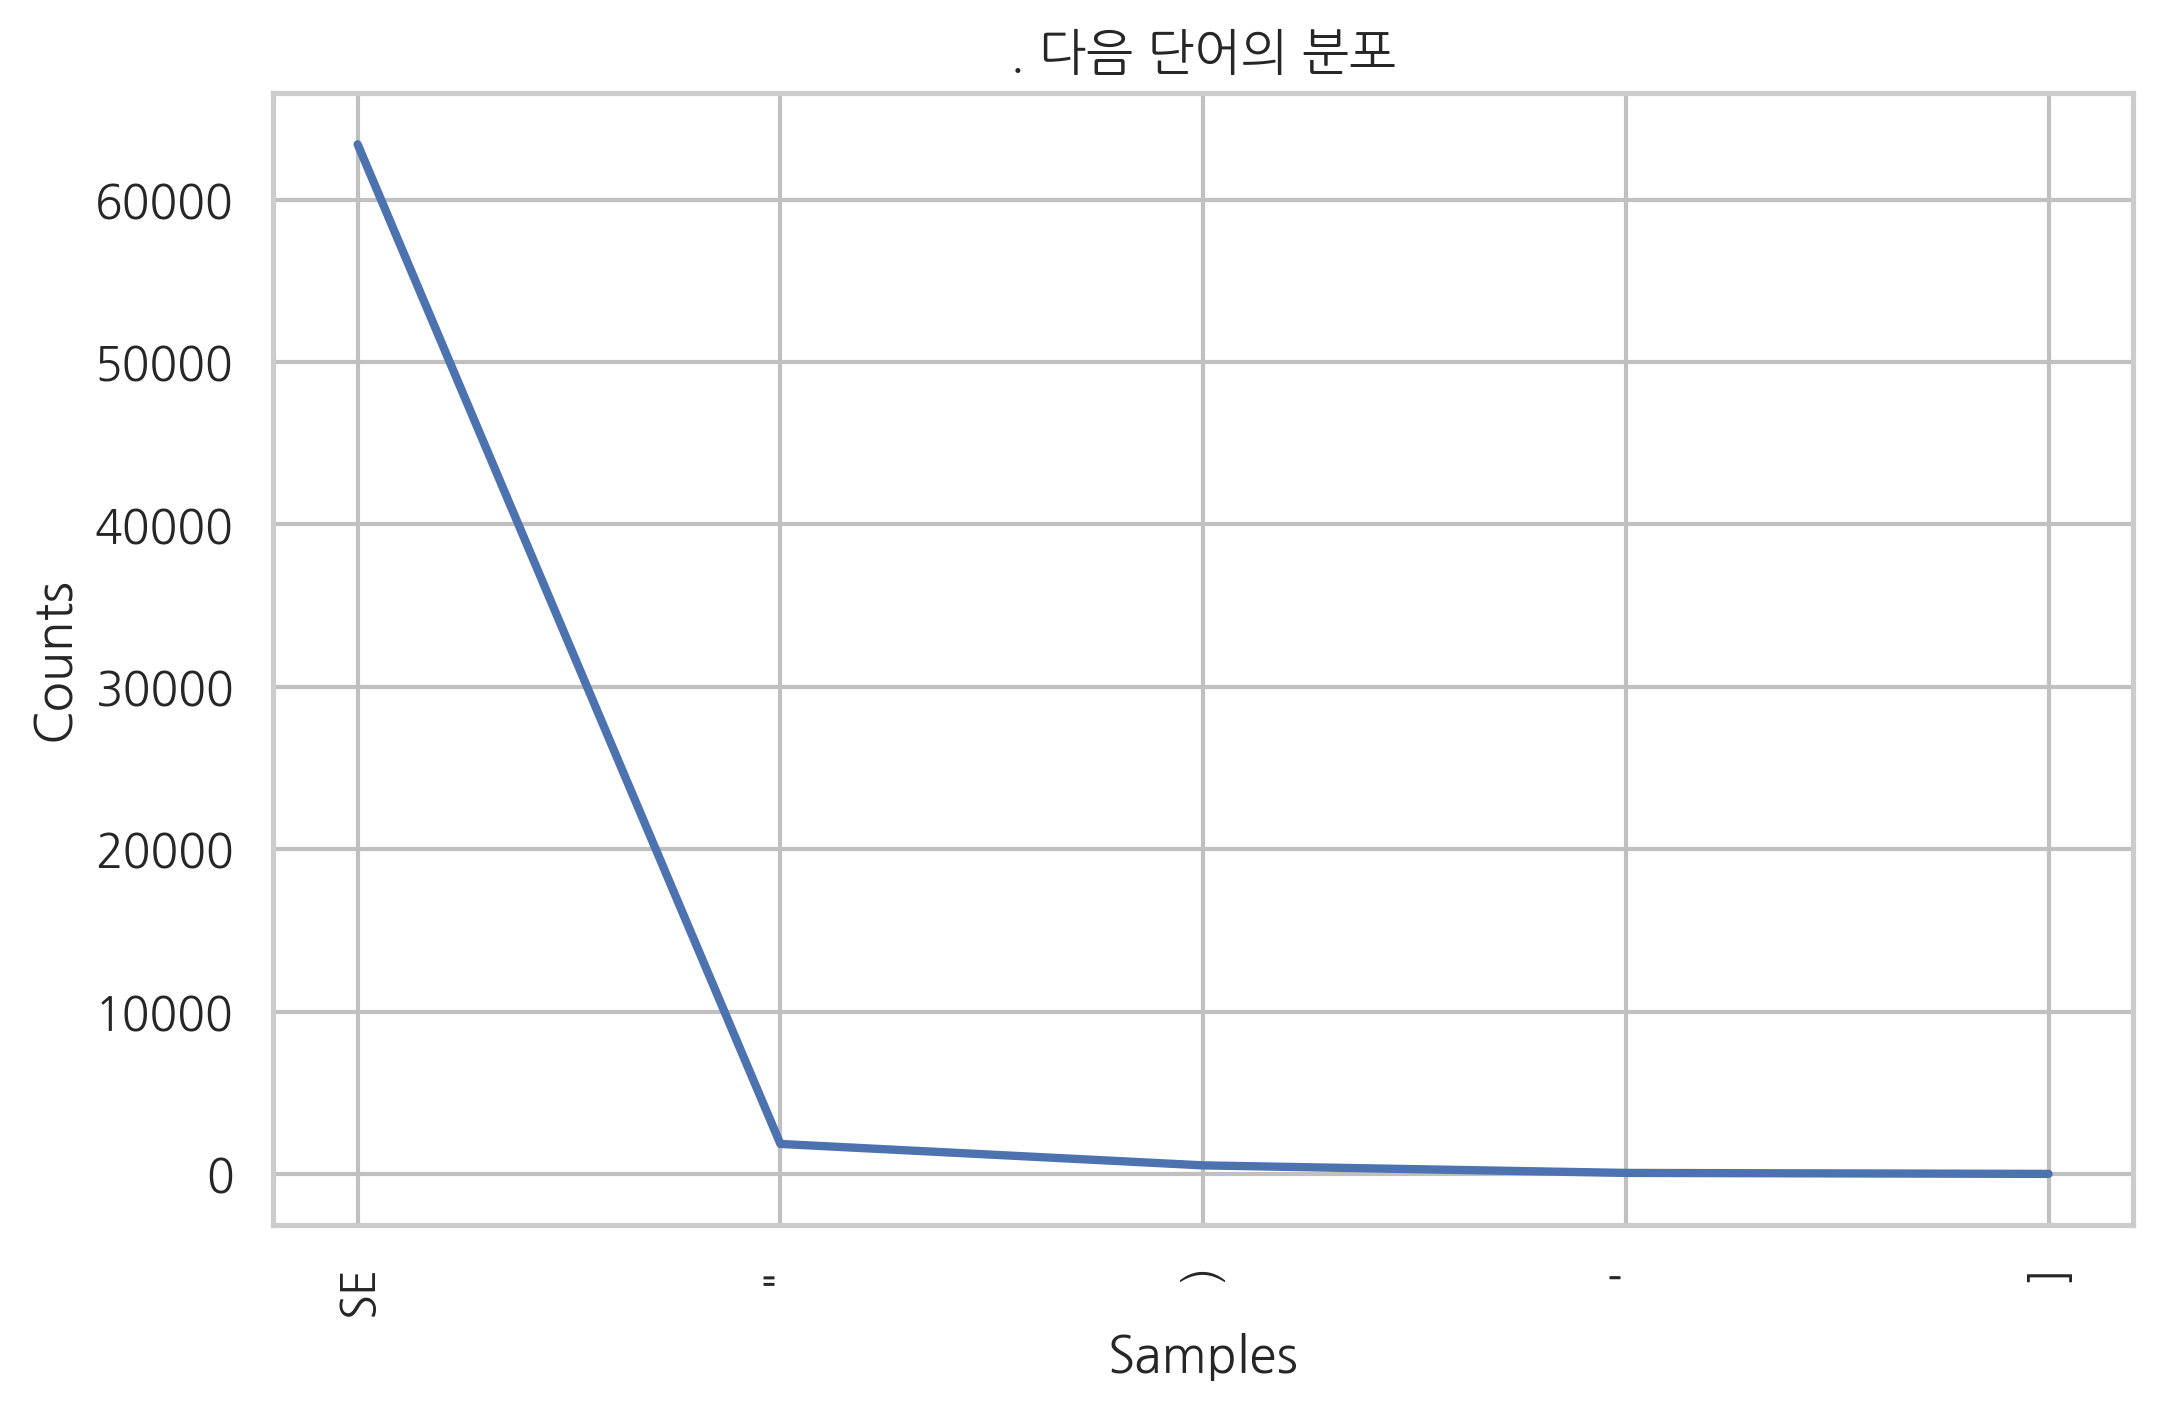

In [50]:
cfd["."].plot(5, title=". 다음 단어의 분포")
plt.show()

### step 3: 조건부 확률 추정

In [51]:
from nltk.probability import ConditionalProbDist, MLEProbDist

cpd = ConditionalProbDist(cfd, MLEProbDist)

학습이 끝나면 조건부 확률의 값을 보거나 샘플 문장을 입력해서 문장의 로그 확률을 구할 수 있다.

In [52]:
cpd["i"].prob("am")

0.018562267971650354

In [53]:
cpd["i"].prob("is")

0.0002249971875351558

In [54]:
cpd["we"].prob("are")

0.08504504504504505

In [55]:
cpd["we"].prob("is")

0.0

### step 4: 문장 확률 계산

조건부 확률을 알게 되면 각 문장의 확률을 구할 수 있다. 


다음으로 이 토큰열을 N-그램형태로 분해한다.
바이그램 모형에서는 전체 문장의 확률은 다음과 같이 조건부 확률의 곱으로 나타난다.

$$ P(\text{SS I am a boy SE}) = P(\text{I}\;|\; \text{SS}) \cdot P(\text{am}\;|\; \text{I}) \cdot P(\text{a}\;|\; \text{am}) \cdot P(\text{boy}\;|\; \text{a}) \cdot P(.\;|\; \text{boy}) \cdot P(\text{SE}\;|\; .) $$



In [56]:
def sentence_score(s):
    p = 0.0
    for i in range(len(s) - 1):
        c = s[i]
        w = s[i + 1]
        p += np.log(cpd[c].prob(w) + np.finfo(float).eps)
    return np.exp(p)

In [57]:
test_sentence = ["i", "like", "the", "movie", "."]
sentence_score(test_sentence)

2.740764134071561e-06

In [58]:
test_sentence = ["like", "i", "the", ".", "movie"]
sentence_score(test_sentence)

1.5015040140827832e-38

### step 5: 무작위 문장 생성

In [59]:
def generate_sentence():
    c = "SS"
    sentence = []
    while True:
        if c not in cpd:
            break
        w = cpd[c].generate()

        if w == "SE":
            break
        else:
            w2 = w

        if c == "SS":
            sentence.append(w2.title())
        else:
            sentence.append(" " + w2)

        c = w
    return "".join(sentence)

In [60]:
generate_sentence()

'Costing , " religion , appeared in _54_ is in roles . " the god , although he is not that he can convincingly but pivotal point .'

## Scikit-Learn 패키지

* 머신러닝 종합 패키지
* 지도학습: 분류 모형
* 비지도학습: 클러스터링
* 샘플 텍스트 말뭉치
* Bag Of Words 인코딩
* TF-IDF 인코딩

## Scikit-Learn 패키지 설치

```
pip install sklearn
```

## BOW (Bag Of Words) 인코딩

* 문서를 숫자 벡터로 변환하는 가장 기본적인 방법

* 전체 문서 $\{d_1, d_2, \ldots, d_n\}$를 구성하는 고정된 단어장(vocabulary, dictionary) $\{t_1, t_2, \ldots, t_m\}$를 만들고 

* $d_i$라는 개별 문서에 단어장에 해당하는 단어들이 포함되어 있는지를 표시하는 방법이다.

$$ x_{i,j} = \text{문서 $d_i$내의 단어 $t_j$의 출현 빈도} $$ 

또는

$$ x_{i,j} = 
\begin{cases}
0, & \text{만약 단어 $t_j$가 문서 $d_i$ 안에 없으면} \\
1. & \text{만약 단어 $t_j$가 문서 $d_i$ 안에 있으면}
\end{cases}
$$


<img src="https://datascienceschool.net/upfiles/f6e5c0c8de20440daa79191788cd6de1.png" />

## Scikit-Learn의 BOW 인코더

Scikit-Learn의 `feature_extraction` 서브패키지와 `feature_extraction.text` 서브패키지는 다음과 같은 BOW 인코더 클래스를 제공

* [`CountVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html): 

  * 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩 벡터를 만든다.


* [`TfidfVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html): 

  * `CountVectorizer`와 비슷하지만 TF-IDF 방식으로 단어의 가중치를 조정한 BOW 인코딩 벡터를 만든다.


* [`HashingVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.HashingVectorizer.html): 

  * 해시 함수(hash function)을 사용하여 적은 메모리와 빠른 속도로 BOW 인코딩 벡터를 만든다.

## Vectorizer 클래스 기능

`CountVectorizer`는 다음과 같은 세가지 작업을 수행한다.

1. 문서를 토큰 리스트로 변환한다.
2. 각 문서에서 토큰의 출현 빈도를 센다.
3. 각 문서를 BOW 인코딩 벡터로 변환한다. 


## Vectorize 클래스 사용법

1. 클래스 객체 생성
2. 말뭉치를 넣고 `fit` 메서드 실행
3. `vocabulary_` 속성에 단어장이 자동 생성됨
4. `transform` 메서드로 다른 문서를 BOW 인코딩
5. BOW 인코딩 결과는 Sparse 행렬로 만들어지므로 `toarray` 메서드로 보통 행렬로 변환

## Vectorizer 인수 

다음과 같은 인수를 가질 수 있다. 

* `stop_words` : 문자열 {‘english’}, 리스트 또는 None (디폴트)
 * stop words 목록.‘english’이면 영어용 스탑 워드 사용.


* `max_df` : 정수 또는 [0.0, 1.0] 사이의 실수. 디폴트 1
 * 단어장에 포함되기 위한 최대 빈도


* `min_df` : 정수 또는 [0.0, 1.0] 사이의 실수.  디폴트 1
 * 단어장에 포함되기 위한 최소 빈도 
 
 
* `ngram_range` : (min_n, max_n) 튜플
 * n-그램 범위 


* `analyzer` : 문자열 {‘word’, ‘char’, ‘char_wb’} 또는 함수
 * 단어 n-그램, 문자 n-그램, 단어 내의 문자 n-그램 


* `token_pattern` : string
 * 토큰 정의용 정규 표현식 


* `tokenizer` : 함수 또는 None (디폴트)
 * 토큰 생성 함수 .


## N-그램

* 단어나 형태소에서 토큰을 생성할 때

  * 1개의 단어로 하나의 토큰을 만들면 : 모노그램 (monogram, 1-gram)
  * 2개의 단어로 하나의 토큰을 만들면 : 바이그램 (bigram, 2-gram)
  * 3개의 단어로 하나의 토큰을 만들면 : 트라이그램 (trigram, 3-gram)
  


* I + am + a + boy

 * 1-gram: "I", "am", "a", "boy"
 * 2-gram: "I am", "am a", "a boy"
 * 3-gram: "I am a", "am a boy"
 

## 실습 7: Scikit-Learn의 CountVectorizer 사용

### step 1: 말뭉치 만들기

In [61]:
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    'The last document?',
]

### step 2: 인코더 객체 생성

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

### step 3: 말뭉치 학습 및 단어장 생성

In [63]:
vect.fit(corpus)
vect.vocabulary_

{'this': 9,
 'is': 3,
 'the': 7,
 'first': 2,
 'document': 1,
 'second': 6,
 'and': 0,
 'third': 8,
 'one': 5,
 'last': 4}

### step 4: 문장을 BOW 인코딩

In [64]:
vect.transform(['This is the second document.']).toarray()

array([[0, 1, 0, 1, 0, 0, 1, 1, 0, 1]])

* 말뭉치에서 학습하지 못한 단어는 무시된다.

In [65]:
vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

### step 5: 불용어 사용

In [66]:
vect = CountVectorizer(stop_words=["and", "is", "the", "this"]).fit(corpus)
vect.vocabulary_

{'first': 1, 'document': 0, 'second': 4, 'third': 5, 'one': 3, 'last': 2}

In [67]:
vect = CountVectorizer(stop_words="english").fit(corpus)
vect.vocabulary_

{'document': 0, 'second': 1}

###  step 6: 빈도수 적용

`max_df`, `min_df` 인수를 사용하여 문서에서 토큰이 나타난 횟수를 기준으로 단어장을 구성할 수도 있다. 토큰의 빈도가 `max_df`로 지정한 값을 초과 하거나 `min_df`로 지정한 값보다 작은 경우에는 무시한다. 인수 값은 정수인 경우 횟수, 부동소수점인 경우 비중을 뜻한다. 

In [68]:
vect = CountVectorizer(max_df=4, min_df=2).fit(corpus)
vect.vocabulary_

{'this': 3, 'is': 2, 'first': 1, 'document': 0}

In [69]:
vect.stop_words_

{'and', 'last', 'one', 'second', 'the', 'third'}

### step 7: N-그램 적용

In [70]:
vect = CountVectorizer(ngram_range=(1, 2)).fit(corpus)
vect.vocabulary_

{'this': 21,
 'is': 5,
 'the': 14,
 'first': 3,
 'document': 2,
 'this is': 22,
 'is the': 6,
 'the first': 15,
 'first document': 4,
 'second': 11,
 'the second': 17,
 'second second': 13,
 'second document': 12,
 'and': 0,
 'third': 19,
 'one': 10,
 'and the': 1,
 'the third': 18,
 'third one': 20,
 'is this': 7,
 'this the': 23,
 'last': 8,
 'the last': 16,
 'last document': 9}

## TF-IDF 인코딩

TF-IDF(Term Frequency – Inverse Document Frequency) 인코딩은 단어를 갯수 그대로 카운트하지 않고 모든 문서에 공통적으로 들어있는 단어의 경우 문서 구별 능력이 떨어진다고 보아 가중치를 축소하는 방법이다. 


구제적으로는 문서 $d$(document)와 단어 $t$ 에 대해 다음과 같이 계산한다.

$$ \text{tf-idf}(d, t) = \text{tf}(d, t) \cdot \text{idf}(t) $$


여기에서

* $\text{tf}(d, t)$: term frequency. 특정한 단어의 빈도수
* $\text{idf}(t)$ : inverse document frequency. 특정한 단어가 들어 있는 문서의 수에 반비례하는 수
 
 $$ \text{idf}(d, t) = \log \dfrac{n}{1 + \text{df}(t)} $$
 
* $n$ : 전체 문서의 수
* $\text{df}(t)$:  단어 $t$를 가진 문서의 수

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidv = TfidfVectorizer().fit(corpus)
tfidv.transform(corpus).toarray()

array([[0.        , 0.38947624, 0.55775063, 0.4629834 , 0.        ,
        0.        , 0.        , 0.32941651, 0.        , 0.4629834 ],
       [0.        , 0.24151532, 0.        , 0.28709733, 0.        ,
        0.        , 0.85737594, 0.20427211, 0.        , 0.28709733],
       [0.55666851, 0.        , 0.        , 0.        , 0.        ,
        0.55666851, 0.        , 0.26525553, 0.55666851, 0.        ],
       [0.        , 0.38947624, 0.55775063, 0.4629834 , 0.        ,
        0.        , 0.        , 0.32941651, 0.        , 0.4629834 ],
       [0.        , 0.45333103, 0.        , 0.        , 0.80465933,
        0.        , 0.        , 0.38342448, 0.        , 0.        ]])

## 해시 트릭 (Hash Trick)

* `CountVectorizer`는 모든 작업을 메모리 상에서 수행

* 처리할 문서의 크기가 커지면 단어장 딕셔너리가 커진다.

* 실행 속도가 느려지거나 실행이 불가능해진다. 




* `HashingVectorizer`를 사용하면 해시 함수(Hash function)를 사용

* 단어에 대한 인덱스 번호를 수식으로 생성

* 사전 메모리가 없고 및 실행 시간을 줄일 수 있다.

* 단어의 충돌이 있을 수 있다.

##  Gensim 패키지

* Bag Of Words 인코딩
* TF-IDF 인코딩
* 토픽 모델링

## Gensim 패키지 설치

```
pip install gensim
```

## Gensim의 BOW 인코딩 기능

* `Dictionary` 클래스 이용

  * `token2id` 속성으로 사전 저장
  * `doc2bow` 메서드로 BOW 인코딩
  
  
* `TfidfModel` 클래스를 이용하면 TF-IDF 인코딩도 가능

## 실습 8: Gensim의 BOW 인코딩

### step 1: 말뭉치 만들기

In [72]:
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    'The last document?',
]

### step 2: 토큰 리스트 생성

In [73]:
token_list = [[text for text in doc.split()] for doc in corpus]
token_list

[['This', 'is', 'the', 'first', 'document.'],
 ['This', 'is', 'the', 'second', 'second', 'document.'],
 ['And', 'the', 'third', 'one.'],
 ['Is', 'this', 'the', 'first', 'document?'],
 ['The', 'last', 'document?']]

### step 3: Dictionary 객체 생성

In [74]:
from gensim.corpora import Dictionary

dictionary = Dictionary(token_list)
dictionary.token2id

{'This': 0,
 'document.': 1,
 'first': 2,
 'is': 3,
 'the': 4,
 'second': 5,
 'And': 6,
 'one.': 7,
 'third': 8,
 'Is': 9,
 'document?': 10,
 'this': 11,
 'The': 12,
 'last': 13}

### step 4: BOW 인코딩

In [75]:
term_matrix = [dictionary.doc2bow(token) for token in token_list]
term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(0, 1), (1, 1), (3, 1), (4, 1), (5, 2)],
 [(4, 1), (6, 1), (7, 1), (8, 1)],
 [(2, 1), (4, 1), (9, 1), (10, 1), (11, 1)],
 [(10, 1), (12, 1), (13, 1)]]

### step 5: TF-IDF 인코딩

In [76]:
from gensim.models import TfidfModel

tfidf = TfidfModel(term_matrix)

for doc in tfidf[term_matrix]:
    print("doc:")
    for k, v in doc:
        print(k, v)

doc:
0 0.49633406058198626
1 0.49633406058198626
2 0.49633406058198626
3 0.49633406058198626
4 0.12087183801361165
doc:
0 0.25482305694621393
1 0.25482305694621393
3 0.25482305694621393
4 0.0620568558708622
5 0.8951785160431313
doc:
4 0.07979258234193365
6 0.5755093812740171
7 0.5755093812740171
8 0.5755093812740171
doc:
2 0.3485847413542797
4 0.08489056411237639
9 0.6122789185961829
10 0.3485847413542797
11 0.6122789185961829
doc:
10 0.37344696513776354
12 0.6559486886294514
13 0.6559486886294514
